# Лабораторная на визуализацию и предварительную обработку

В ходе этой работы мы поработаем с данными из Kaggle "Предсказание цены на дом" (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques), выполним визуализацию данных, статическую оценку признаков и адекватную предварительную обработку данных.

## Импортируем библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Получаем данные, проводим анализ и выполняем визуализацию

### Скачиваем файл с данными из Kaggle "Предсказание цены на дом"

In [81]:
df = pd.read_csv('https://raw.githubusercontent.com/lomonoga/ML_Learning_Labs/main/lab_0/data/train.csv', delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Удаляем столбцы ID, PoolQC, MiscFeature, Alley и Fence так как они имеют в себе много пустых значений или не несут значимой информации и смотрим сколько всего числовых и категориальных признаков

In [82]:
df.drop('Id', axis=1, inplace=True)
df.drop('PoolQC', axis=1, inplace=True)
df.drop('MiscFeature', axis=1, inplace=True)
df.drop('Alley', axis=1, inplace=True)
df.drop('Fence', axis=1, inplace=True)

target_column = 'SalePrice'
cat_columns = []
num_columns = []

for column_name in df.columns:
    if df[column_name].dtypes == object:
        cat_columns += [column_name]
    else:
        num_columns += [column_name]

print('Категориальные данные:\t ', cat_columns, '\n Число столблцов = ', len(cat_columns))

print('Числовые данные:\t ', num_columns, '\n Число столблцов = ', len(num_columns))

Категориальные данные:	  ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 
 Число столблцов =  39
Числовые данные:	  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF

### Рассмотрим числовые данные

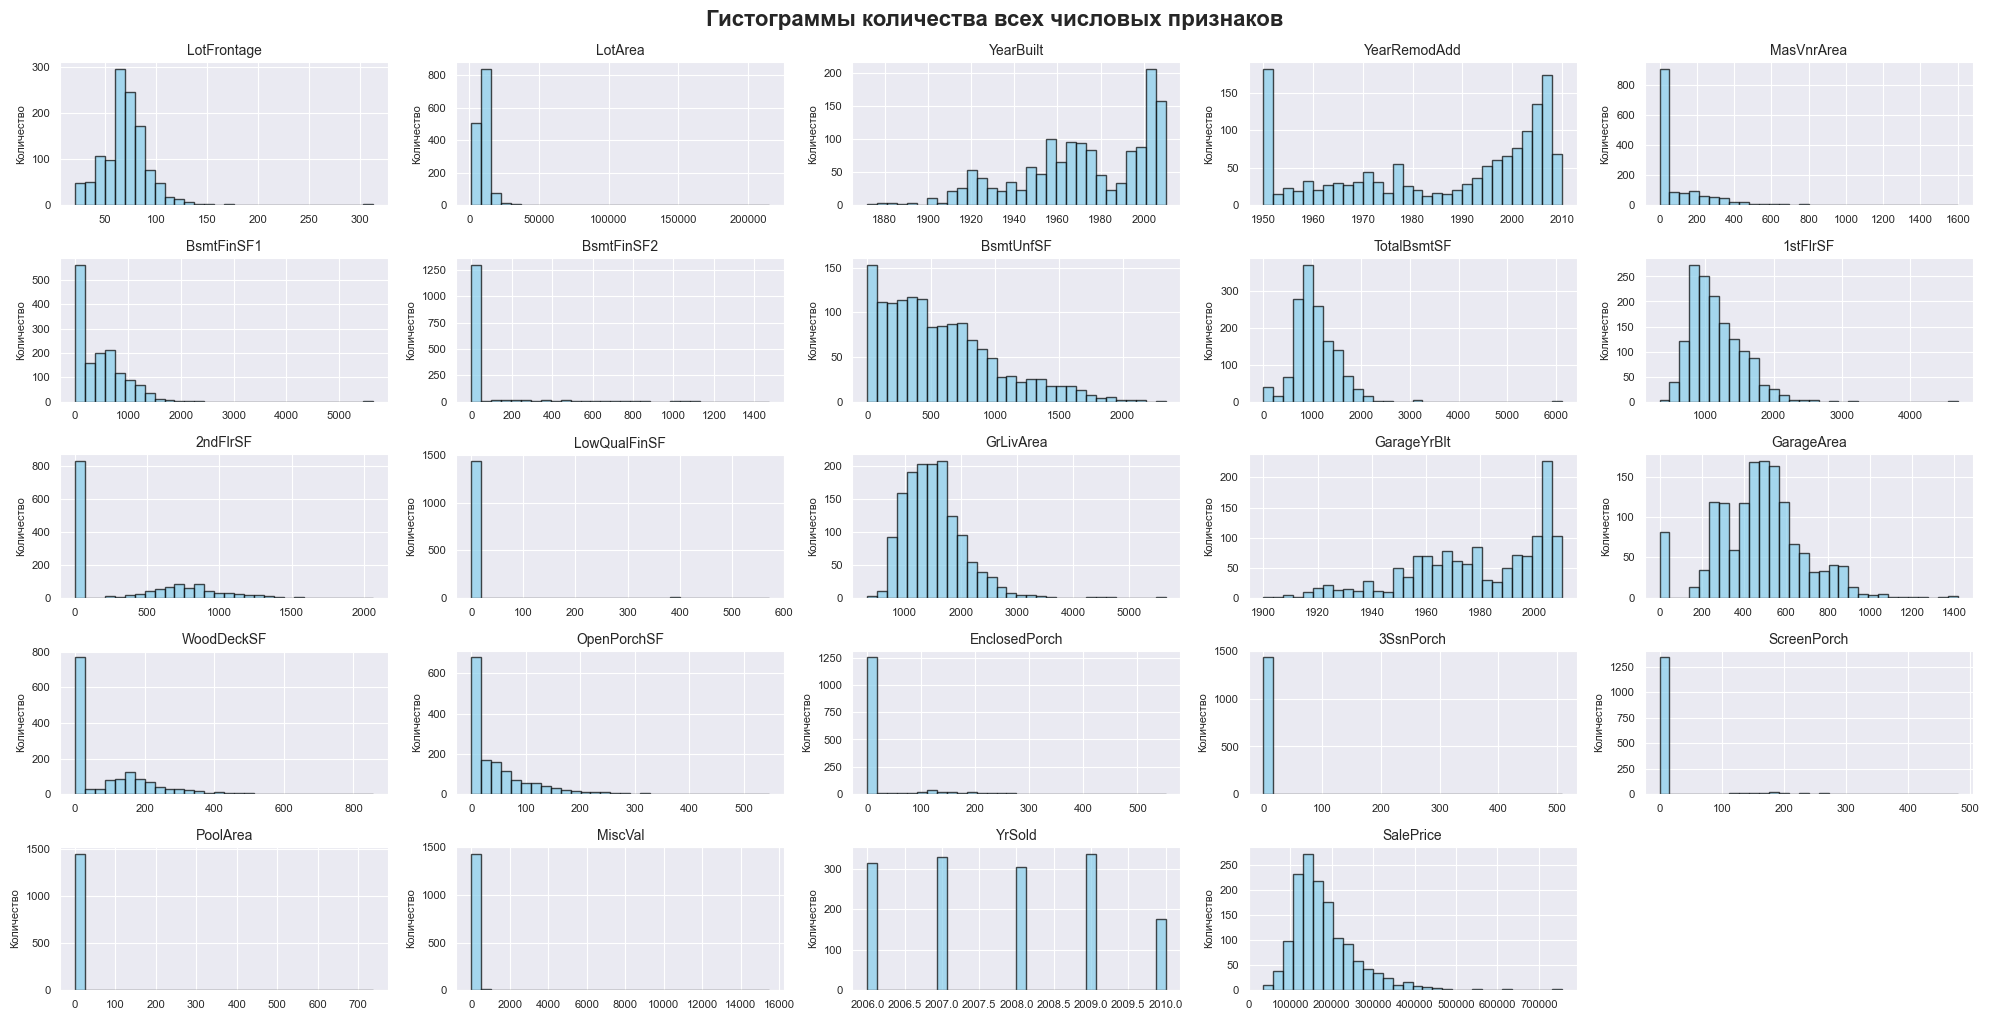

In [79]:
fig, axes = plt.subplots(8, 5, figsize=(20, 16))
axes = axes.ravel()

for i, column in enumerate(num_columns):
    axes[i].hist(df[column], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{column}', fontsize=10, pad=5)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Количество', fontsize=8)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

for i in range(len(num_columns), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Гистограммы количества всех числовых признаков', fontsize=16, fontweight='bold', y=0.99)
plt.tight_layout()
plt.show()

Теперь нарисуем скатерограмму для числовых признаков

In [ ]:
features = [col for col in num_columns if col != target_column]

n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(32, 16))
axes = axes.flatten() if n_features > 1 else [axes]

for i, feature in enumerate(features):
    if i < len(axes):
        axes[i].scatter(df[feature], df[target_column], alpha=0.6, s=20)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(target_column)
        axes[i].set_title(f'{feature} vs {target_column}')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

На обоих графиках видно, что параметры имеют аномалии, в частности некоторые числовые на самом деле лишь таковыми прикидываются, давайте поможем их найти и перевести в нужную группу! Для этого посмотрим на графики и те, которые рисуются как столбы из Афин - переведём в категориальные (но логически учитывая, что год численный параметр).


In [83]:
incorrect_columns = ['MSSubClass', 'OverallQual', 'OverallCond', 'TotRmsAbvGrd', 'MoSold', 'BsmtFullBath',
                     'BsmtHalfBath', 'FullBath', 'HalfBath',
                     'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars']

for column in incorrect_columns:
    cat_columns.append(column)
    num_columns.remove(column)

num_columns

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

Теперь давайте посмотрим как между собой параметры коррелируют

In [ ]:
cm = sns.color_palette("vlag", as_cmap=True)

df[num_columns].corr().style.background_gradient(cmap=cm,
                                                 vmin=-1,
                                                 vmax=1)

Как мы видим целевой параметр имеет сильную корреляцию не от всех параметров (что и логично), но уже можно сказать на какие стоит обращать более пристальное внимание

### Рассмотрим категориальные данные

In [77]:
df[cat_columns].describe()

,MSSubClass,OverallQual,OverallCond,TotRmsAbvGrd,MoSold,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,MSSubClass
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,6.099315,5.575342,6.517808,6.321918,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,0.613014,1.767123,56.897260
std,42.300571,1.382997,1.112799,1.625393,2.703626,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.644666,0.747315,42.300571
min,20.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,20.000000,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,20.000000
50%,50.000000,6.000000,5.000000,6.000000,6.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,2.000000,50.000000
75%,70.000000,7.000000,6.000000,7.000000,8.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,70.000000
max,190.000000,10.000000,9.000000,14.000000,12.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,3.000000,4.000000,190.000000


In [88]:
df[cat_columns].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
MSSubClass       15
OverallQual      10
OverallCond       9
TotRmsAbvGrd     12
MoSold           12
BsmtFullBath      4
BsmtHalfBath      3
FullBath          4
HalfBath          3
BedroomAbvGr      8
KitchenAbvGr      4


Все признаки имеют сравнимо небольшое кол-во уникальных значений - это хорошо, не нужно объединять редки значения между собой

Проведём визуализацию между категориальными признаками и целевой переменной

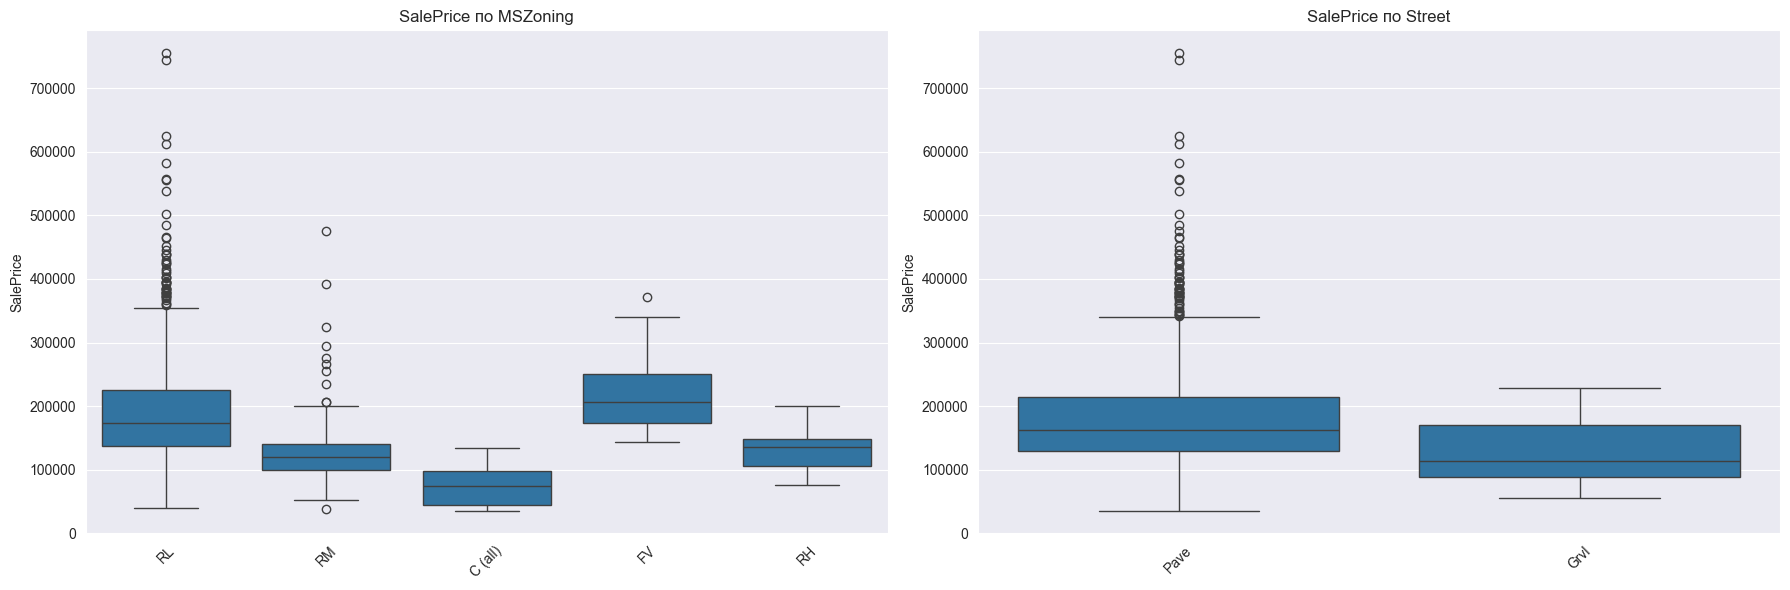

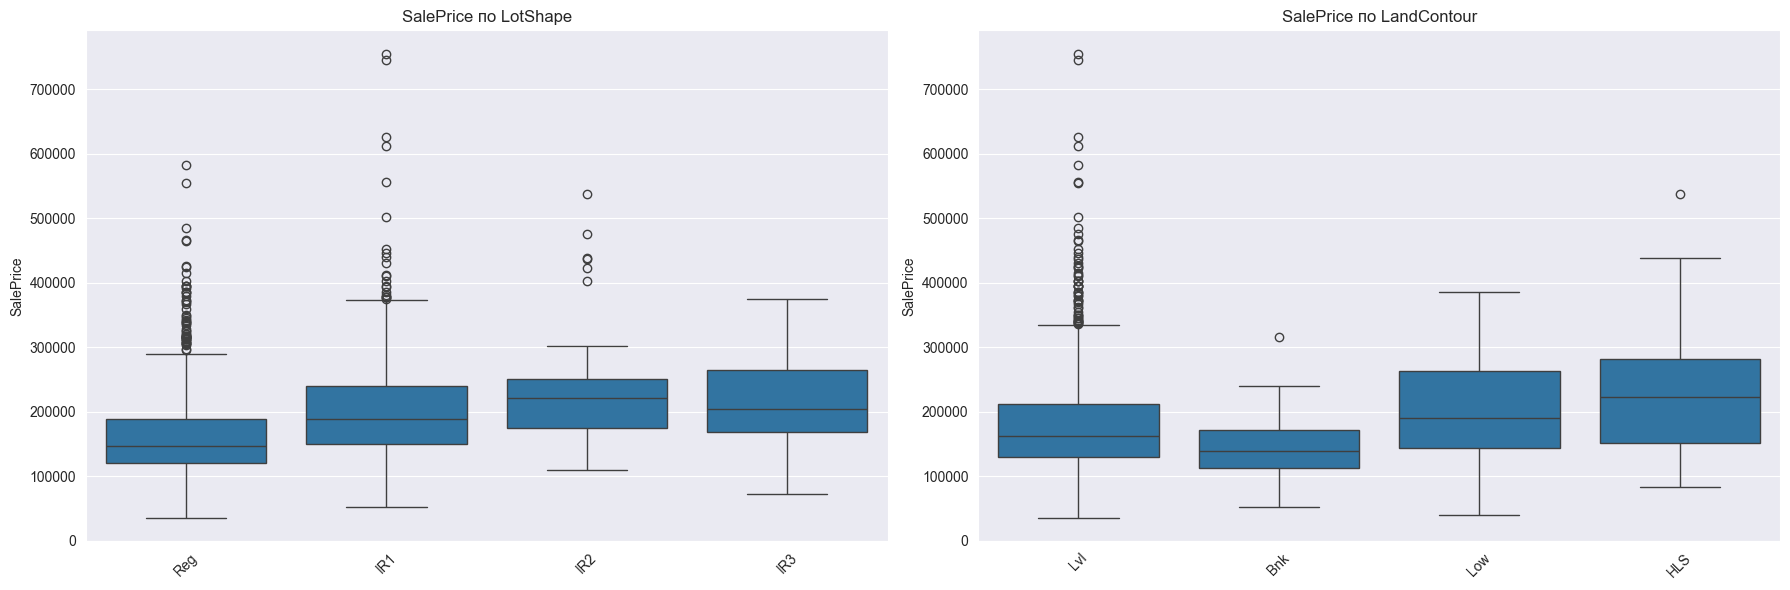

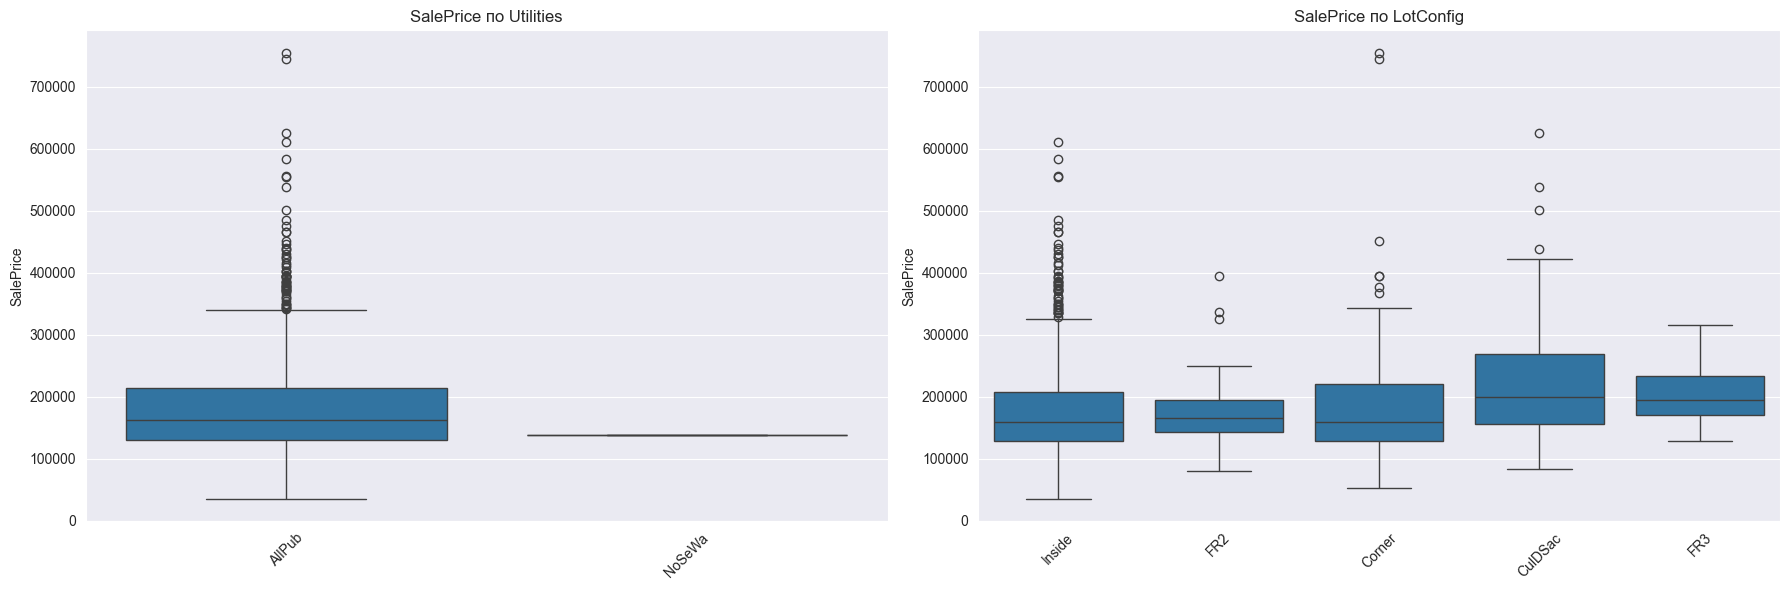

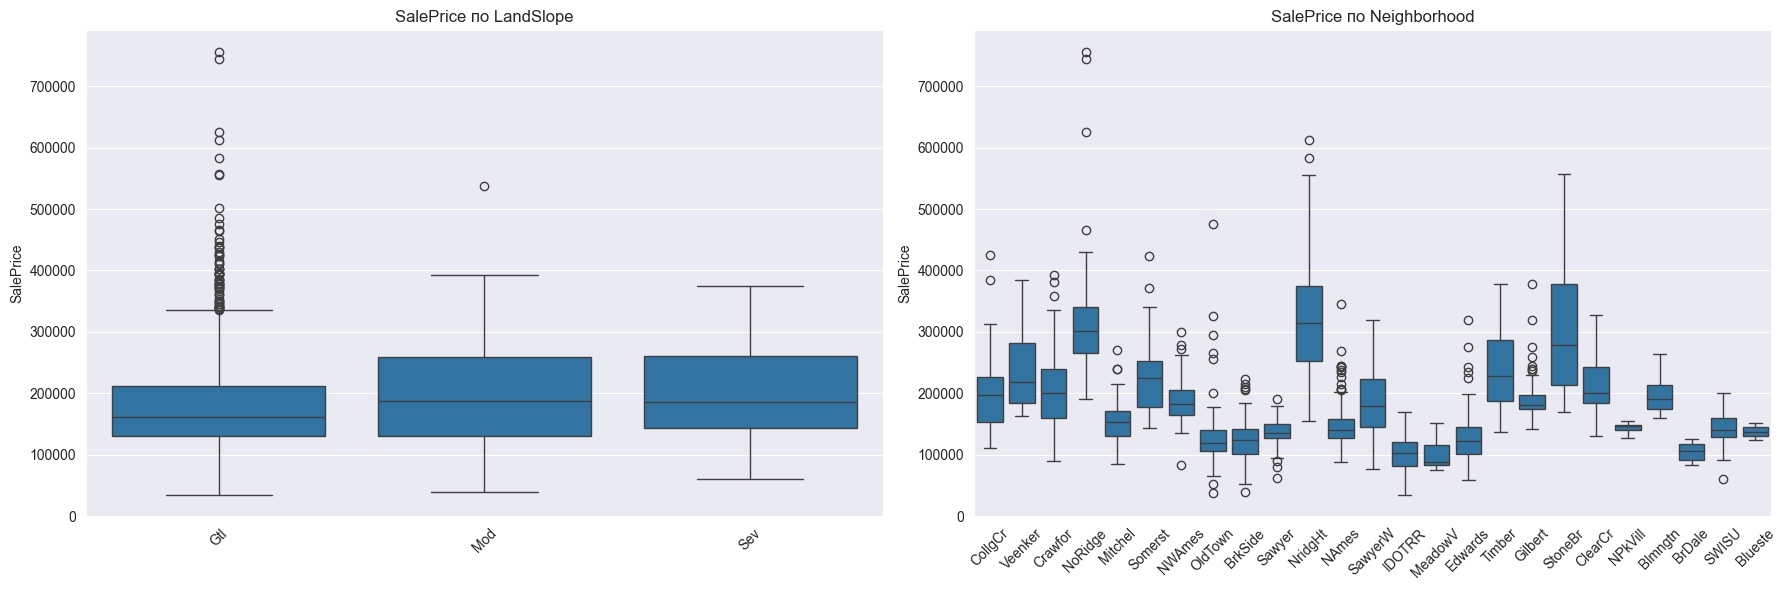

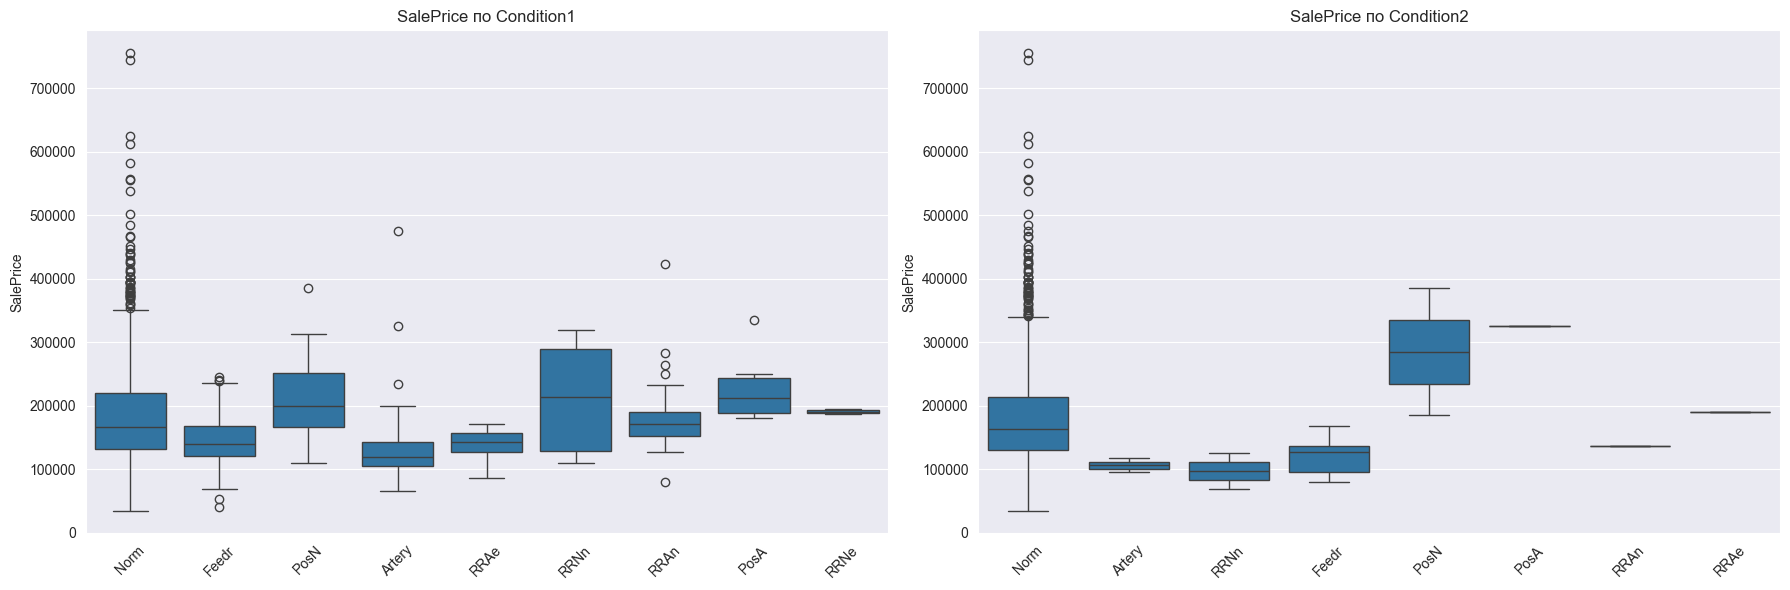

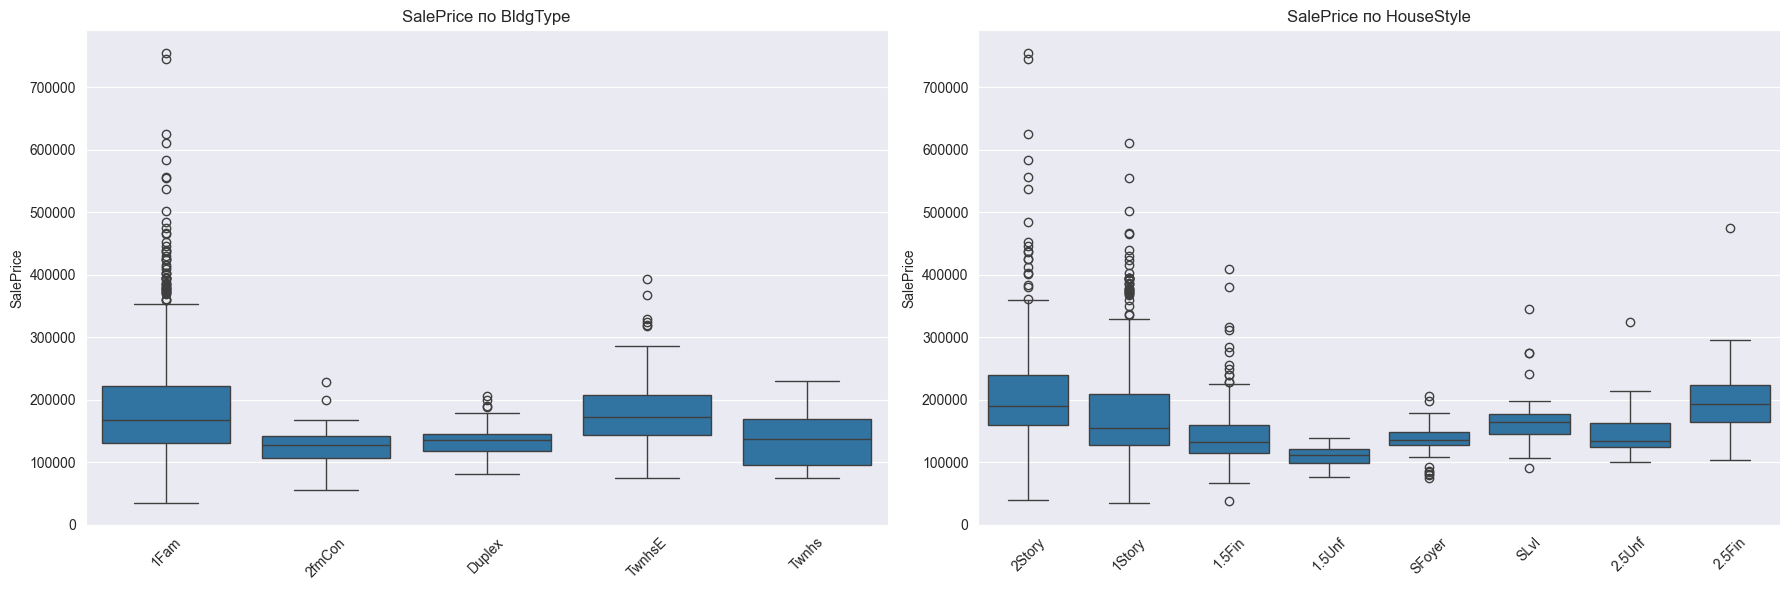

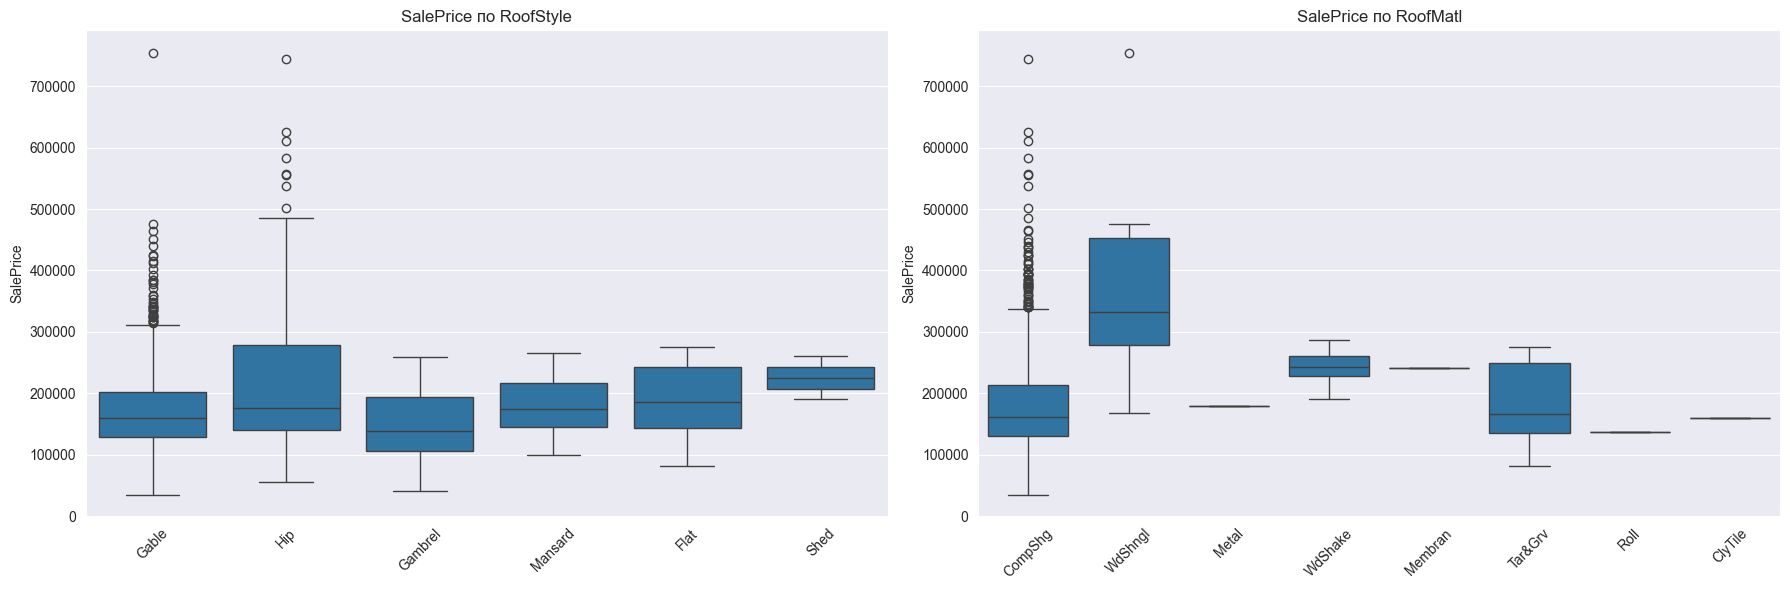

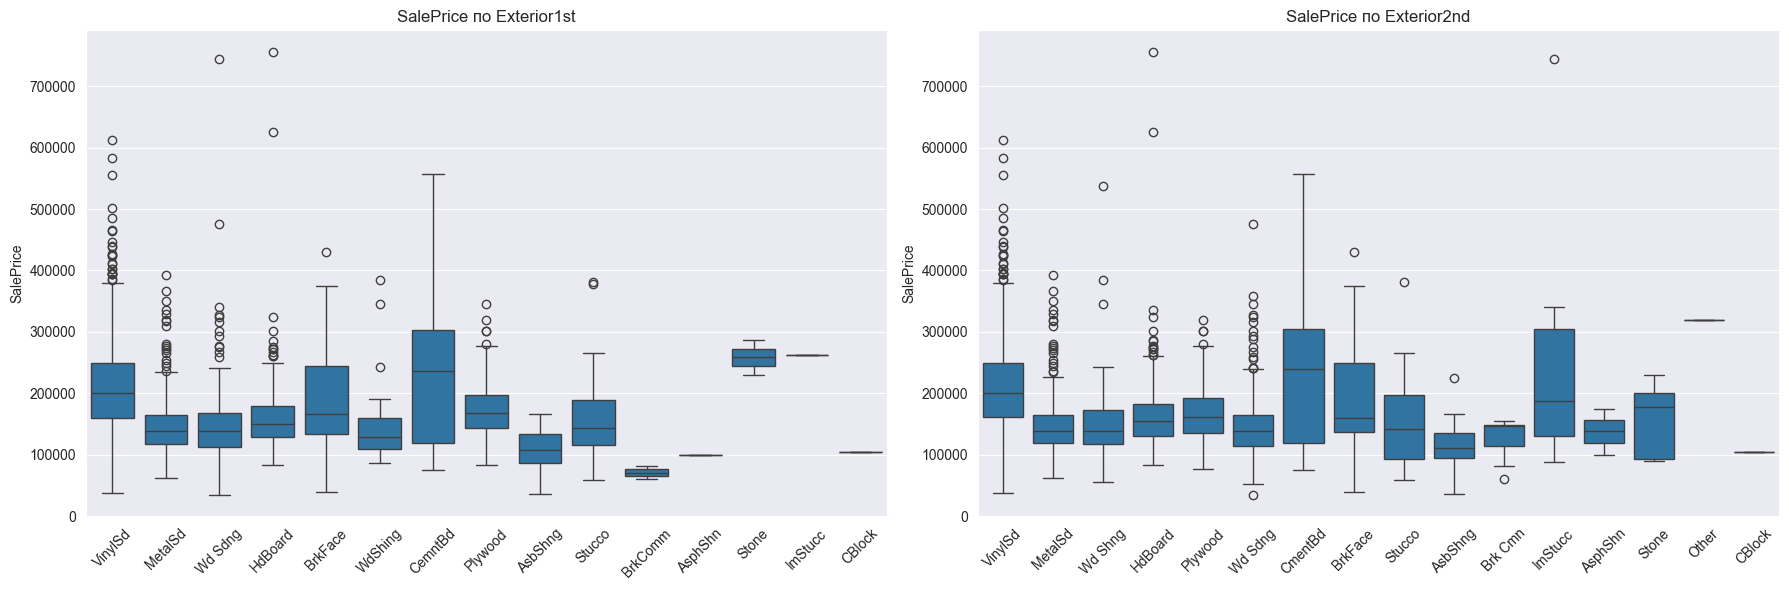

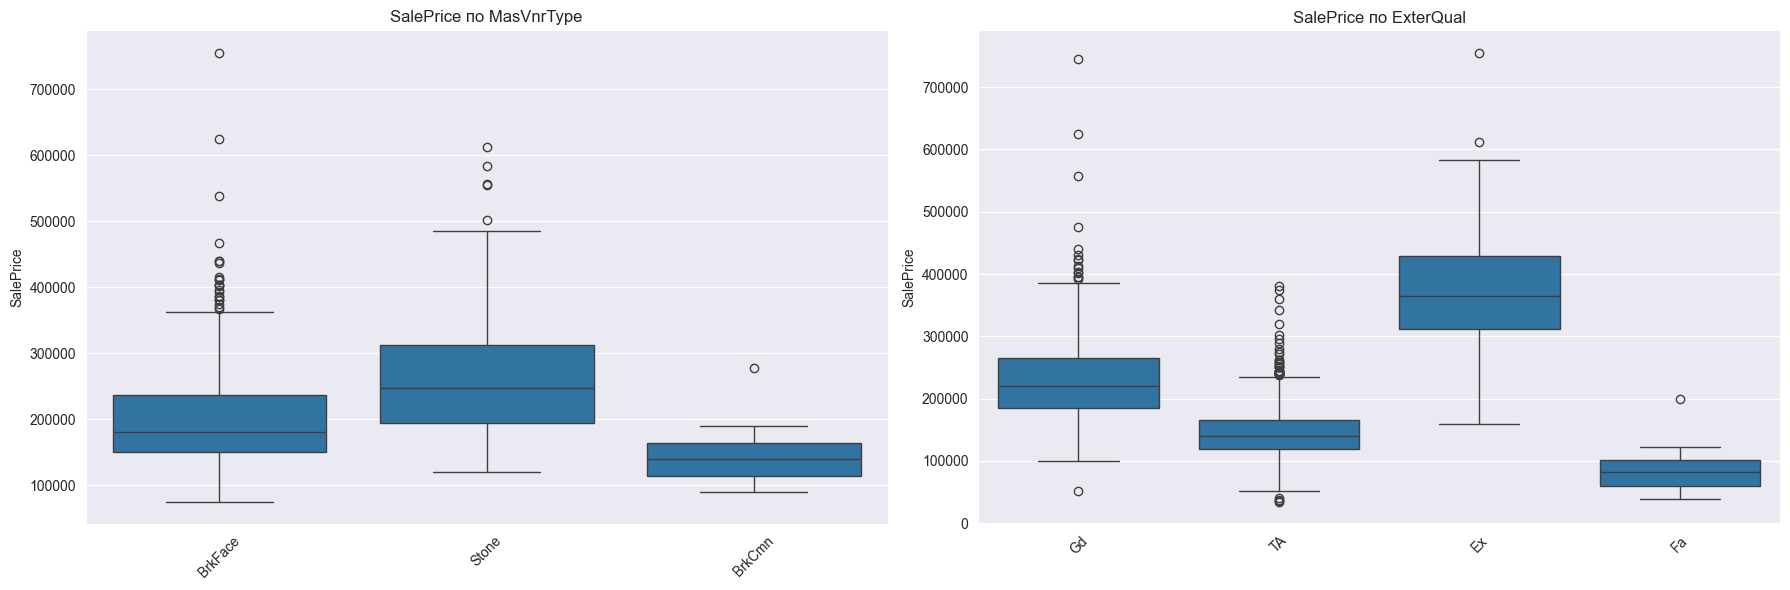

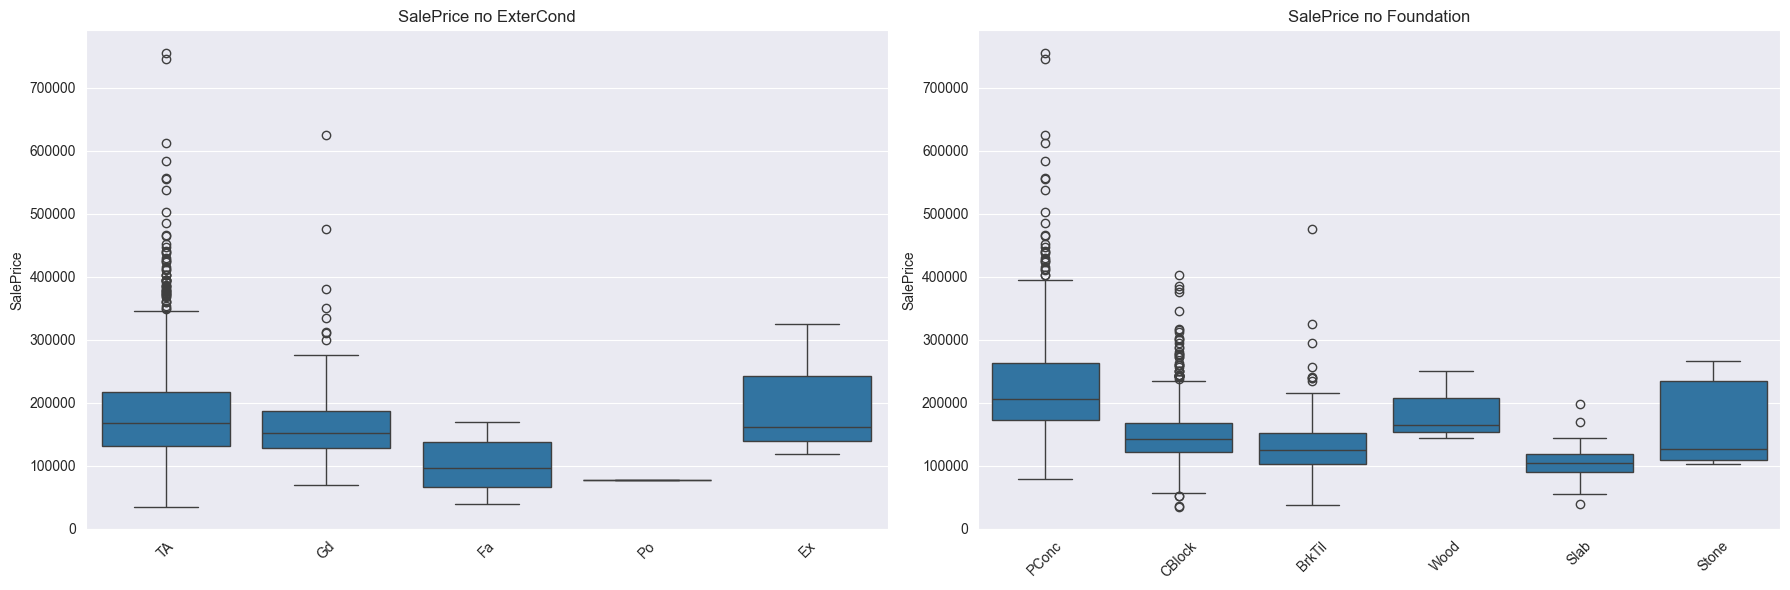

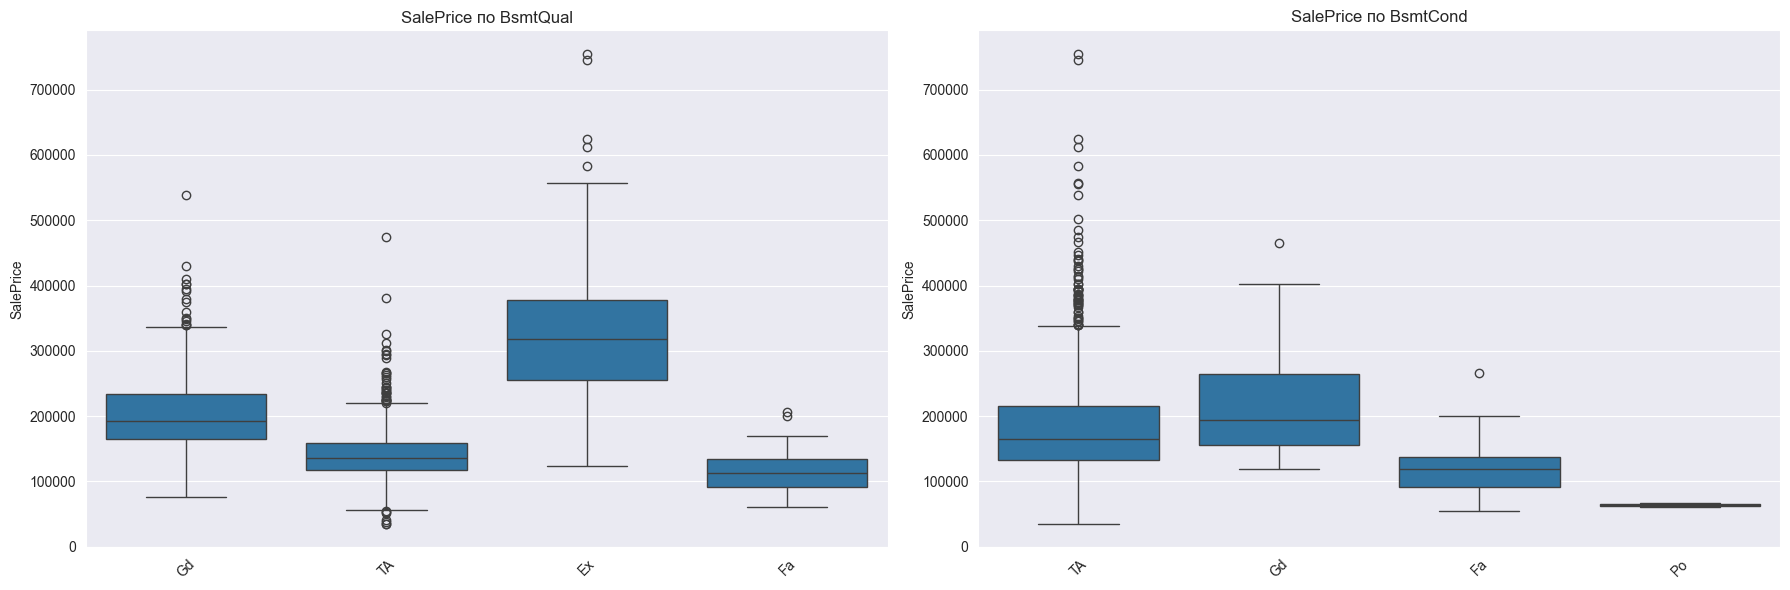

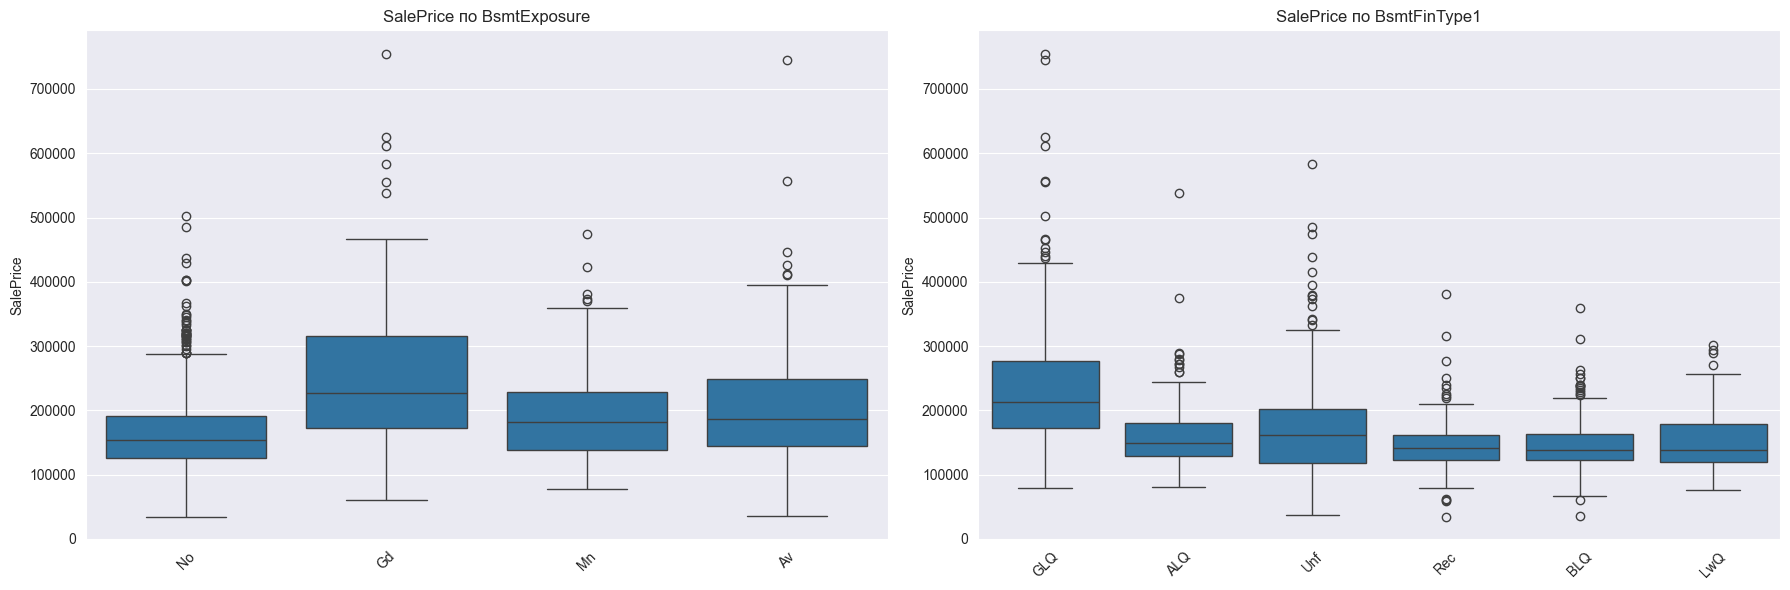

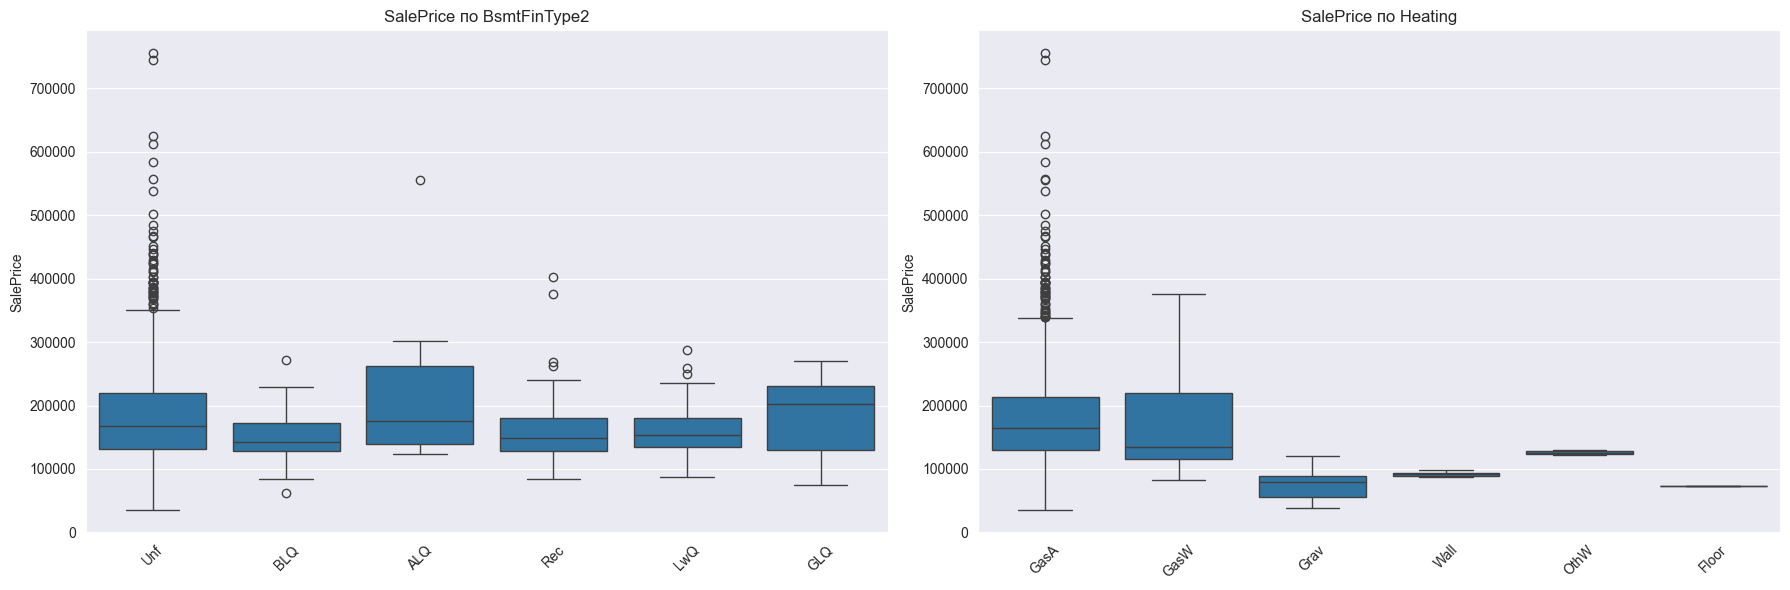

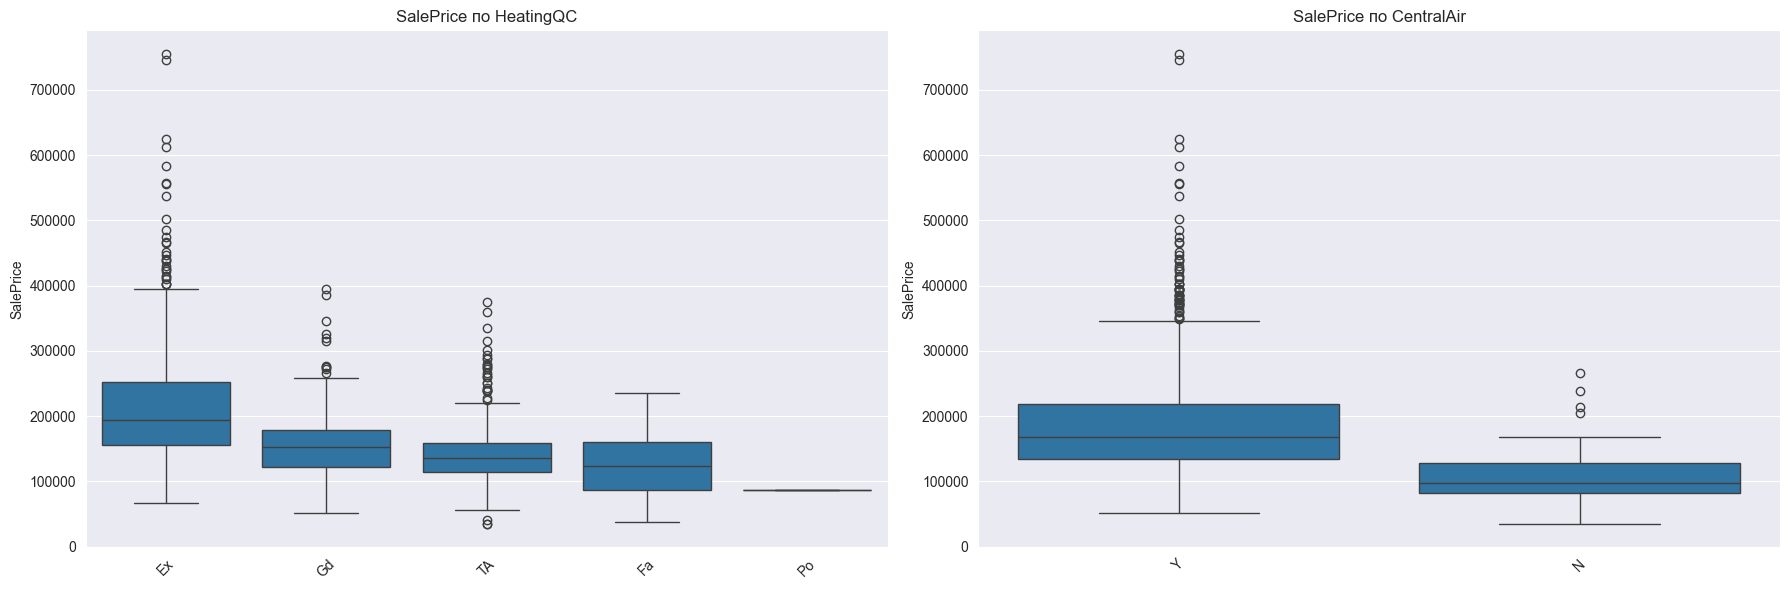

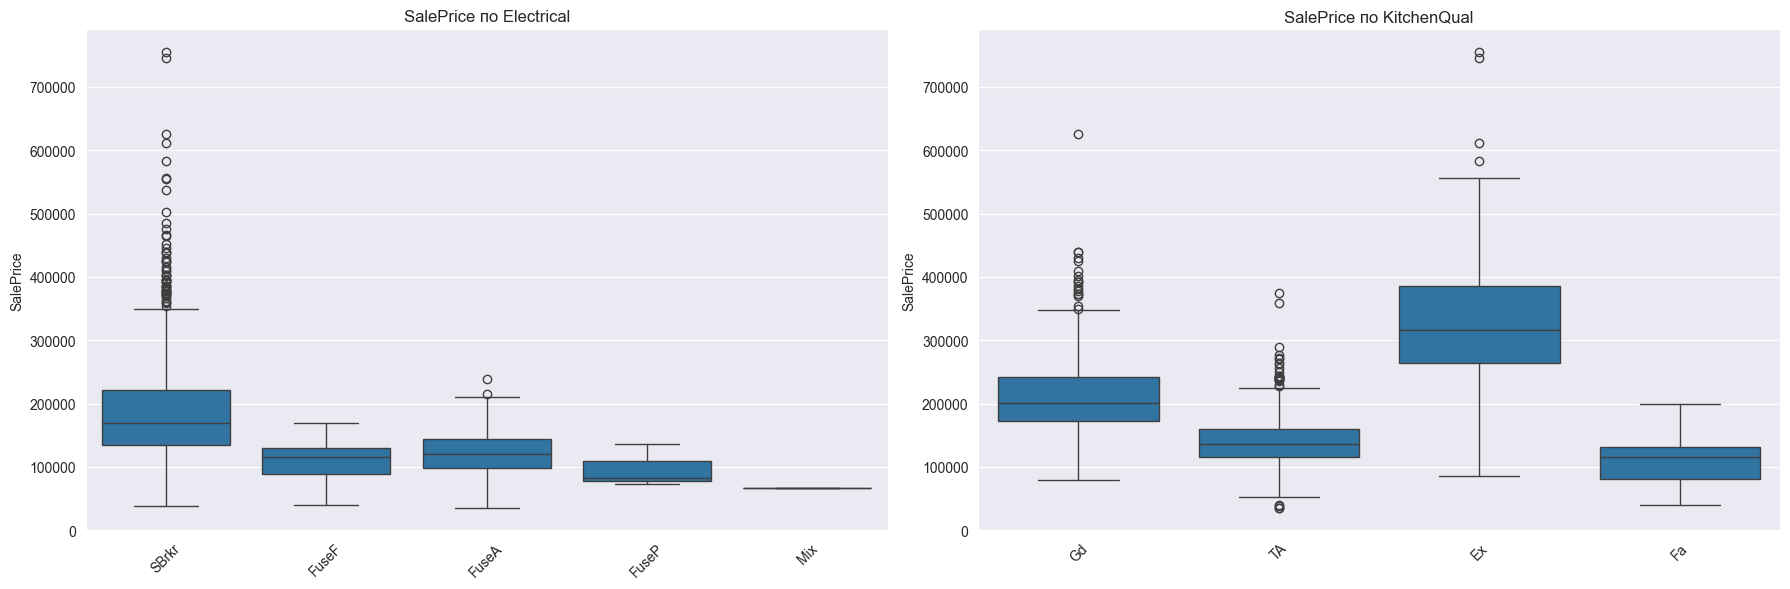

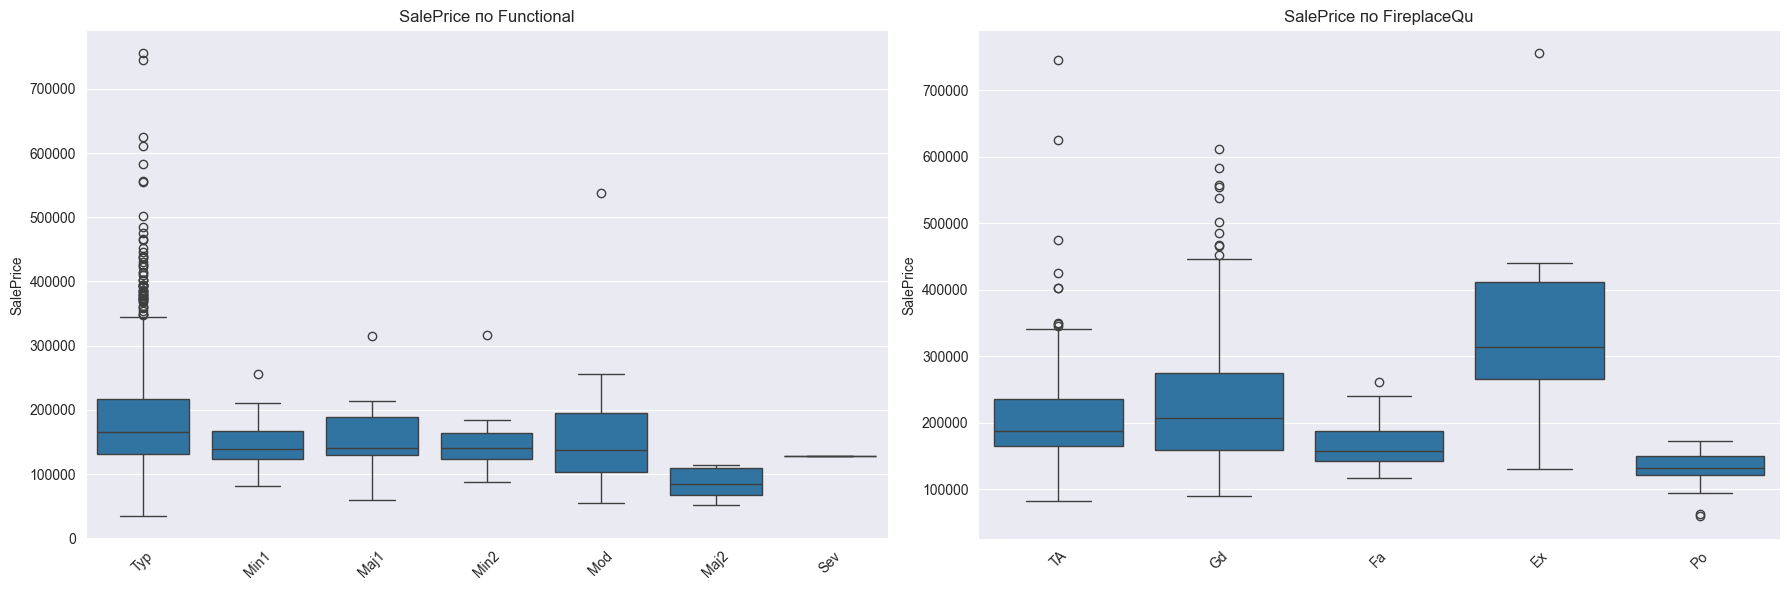

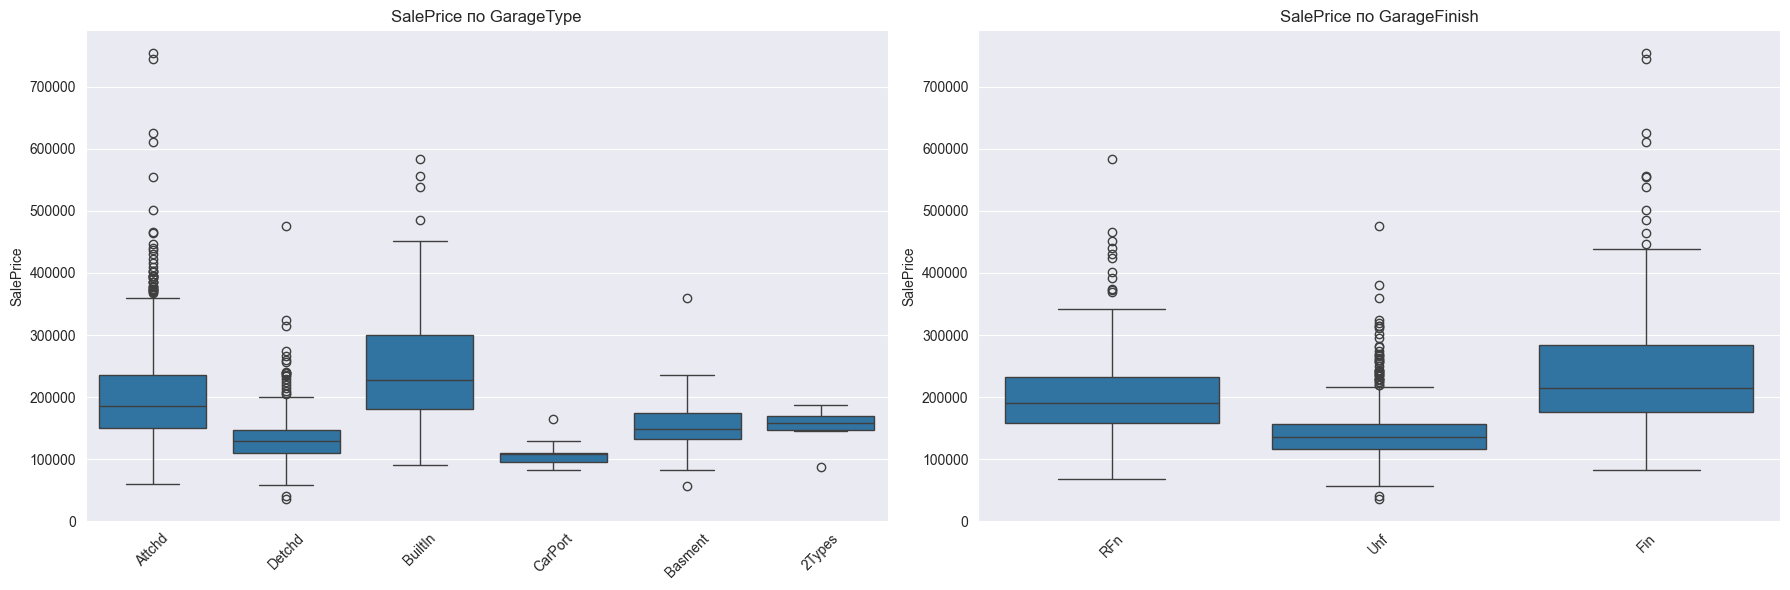

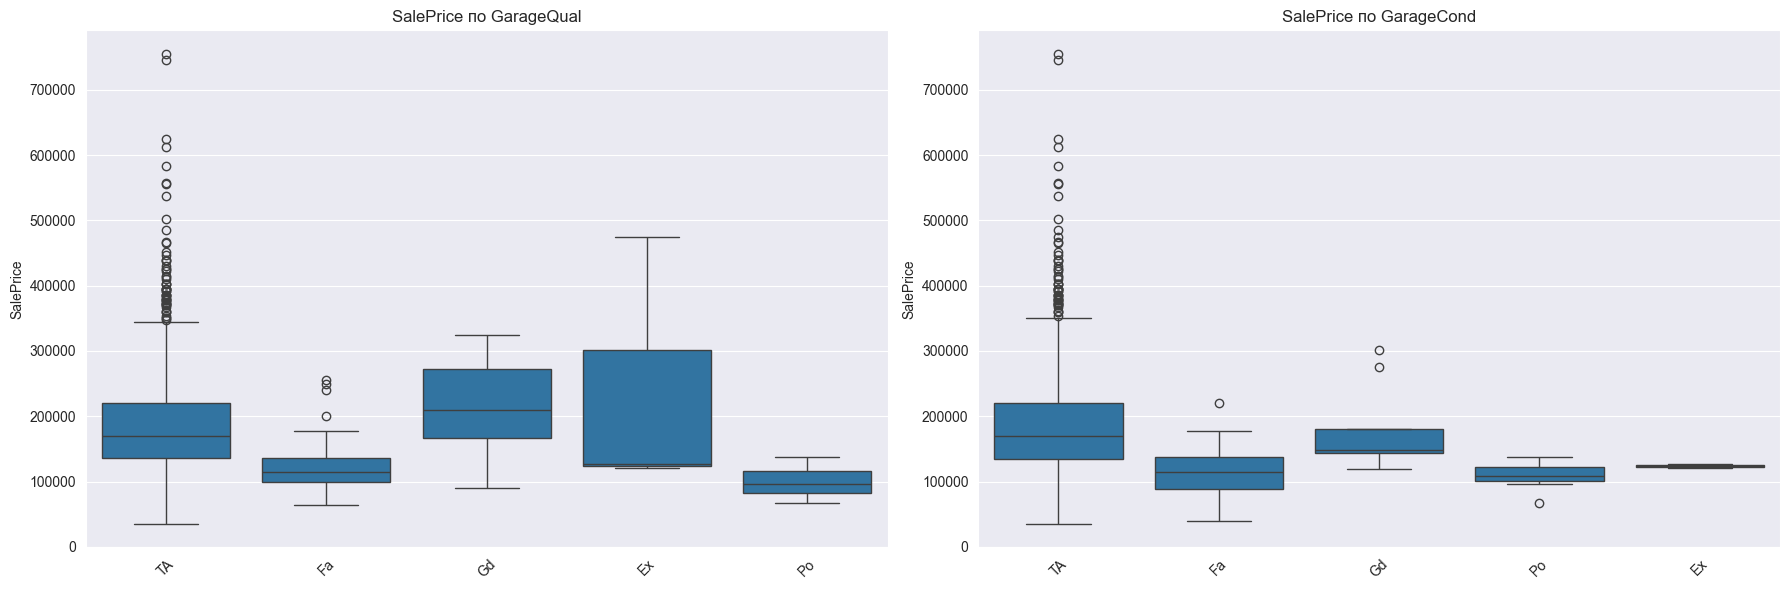

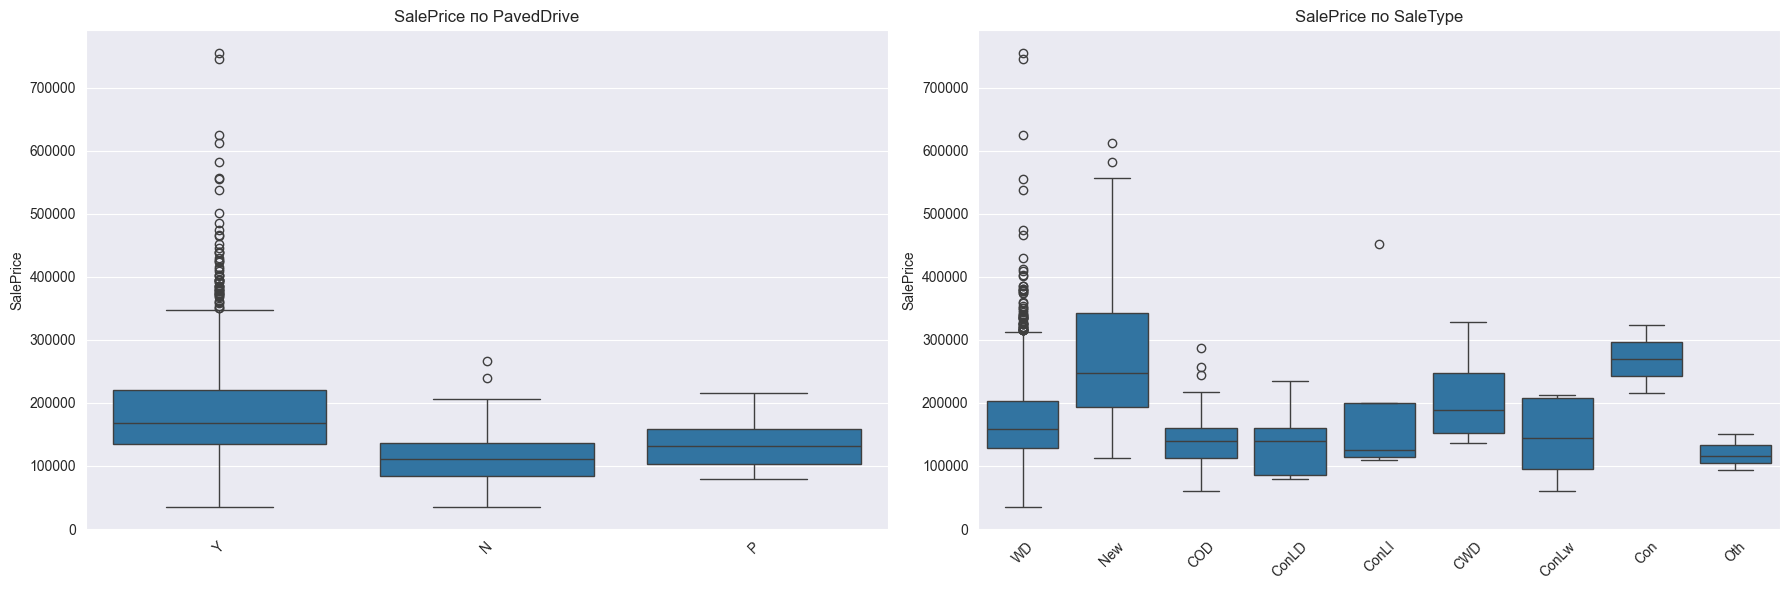

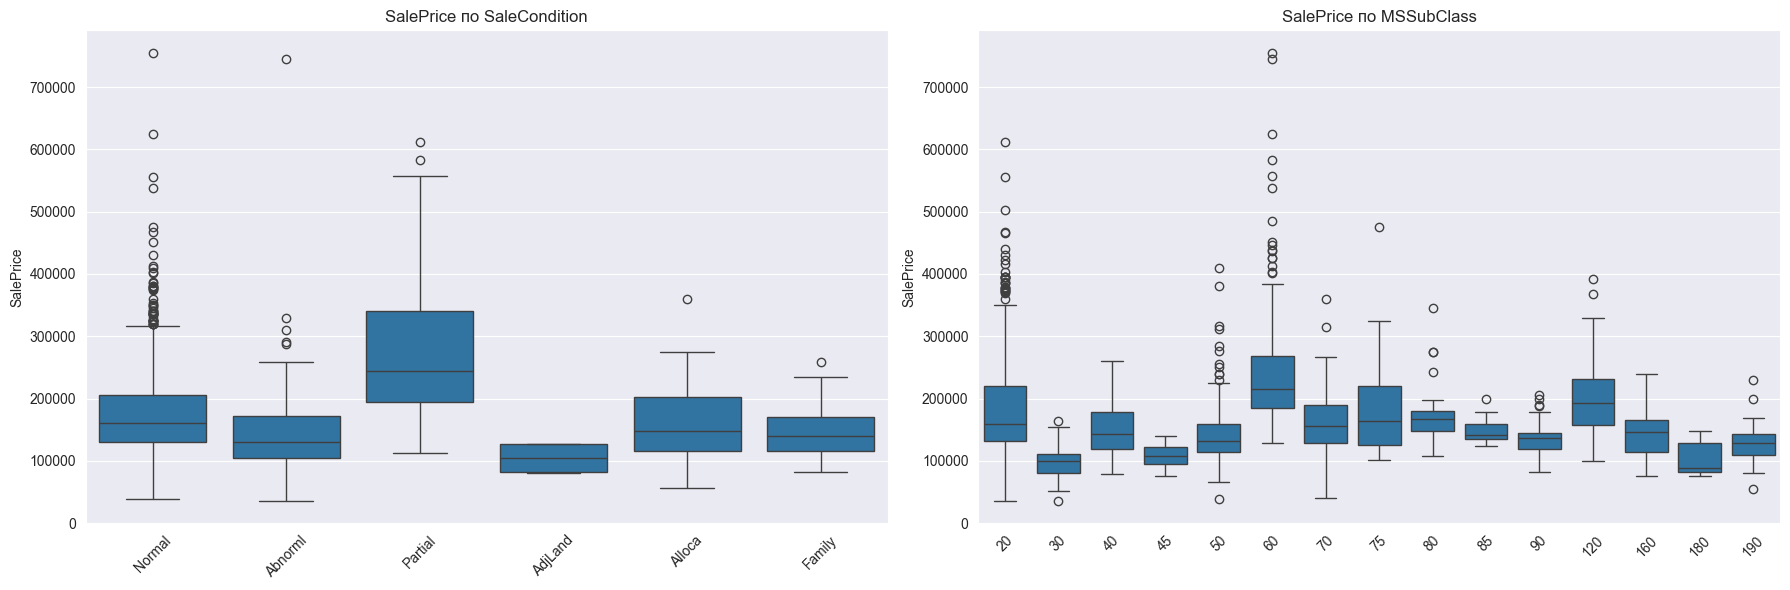

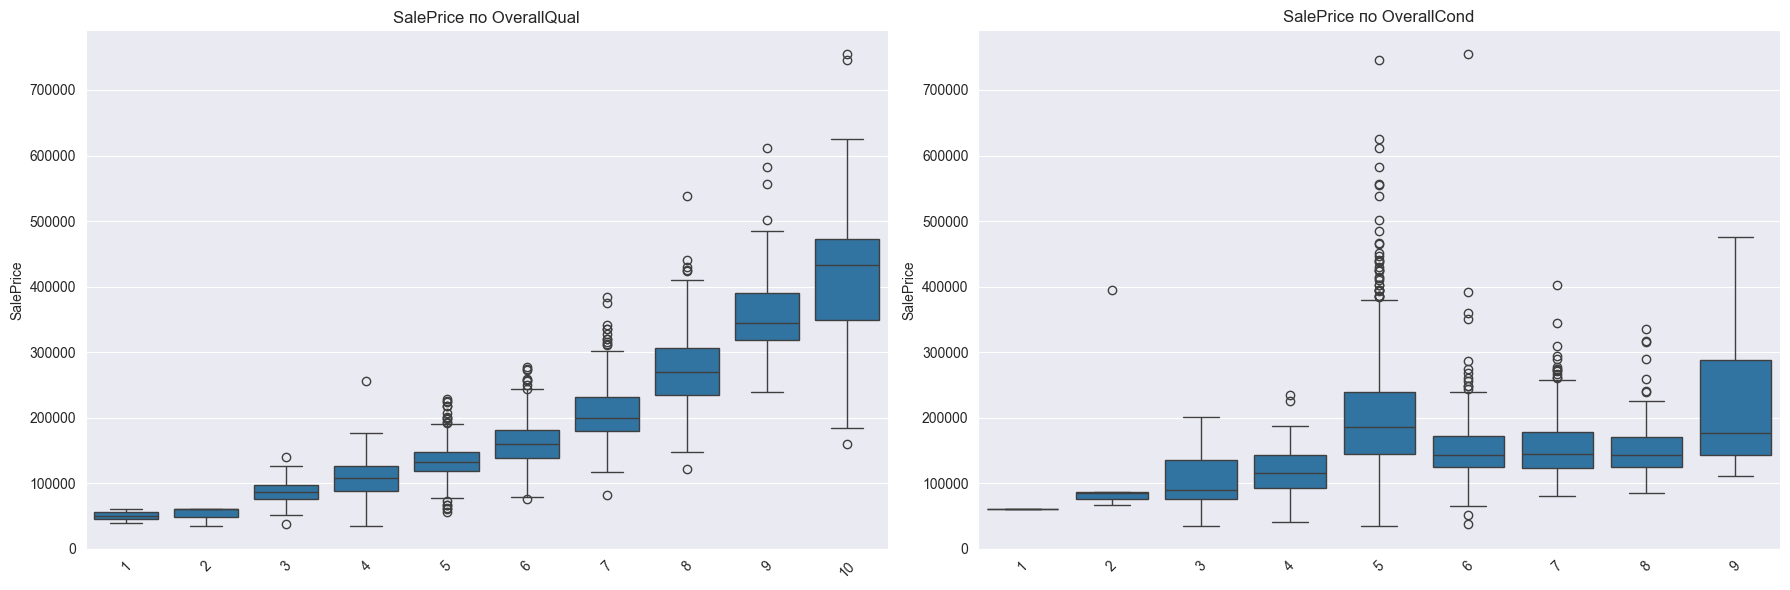

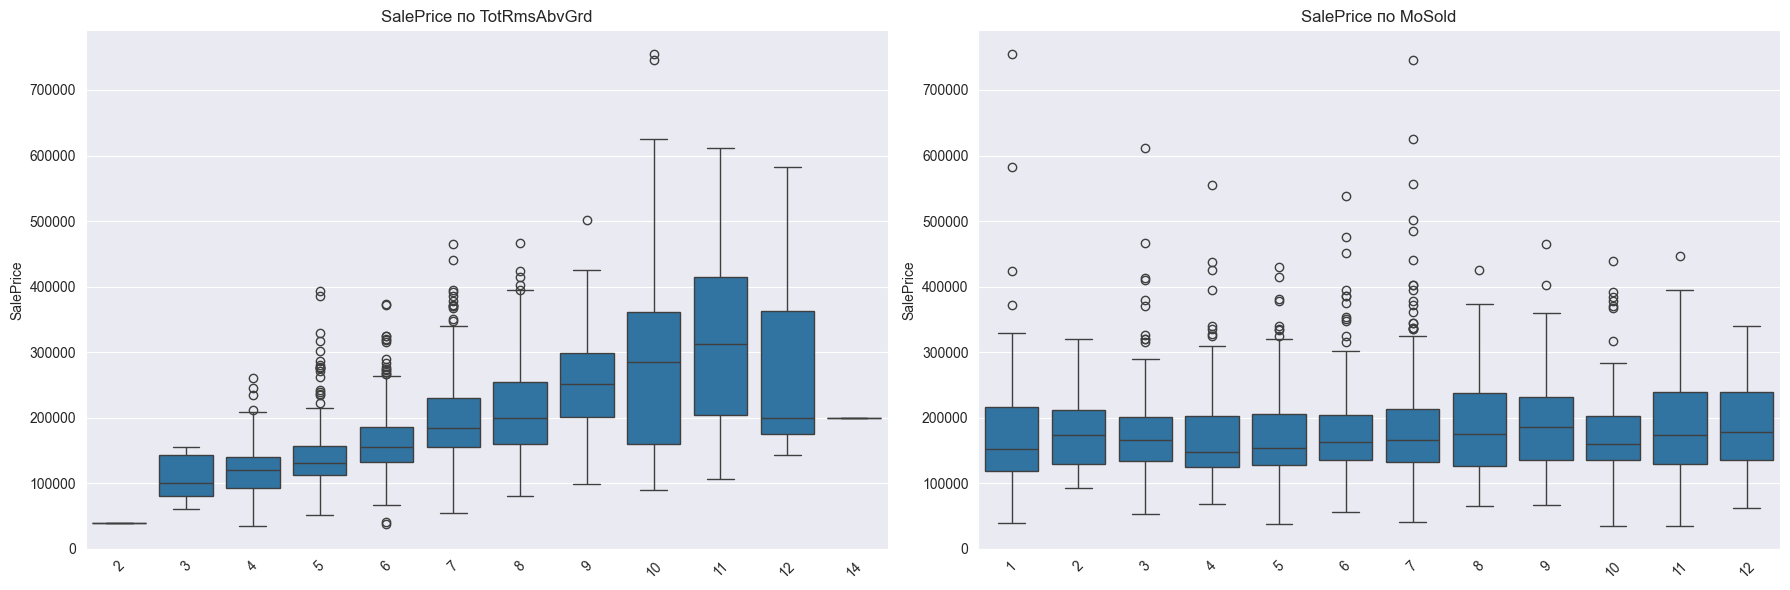

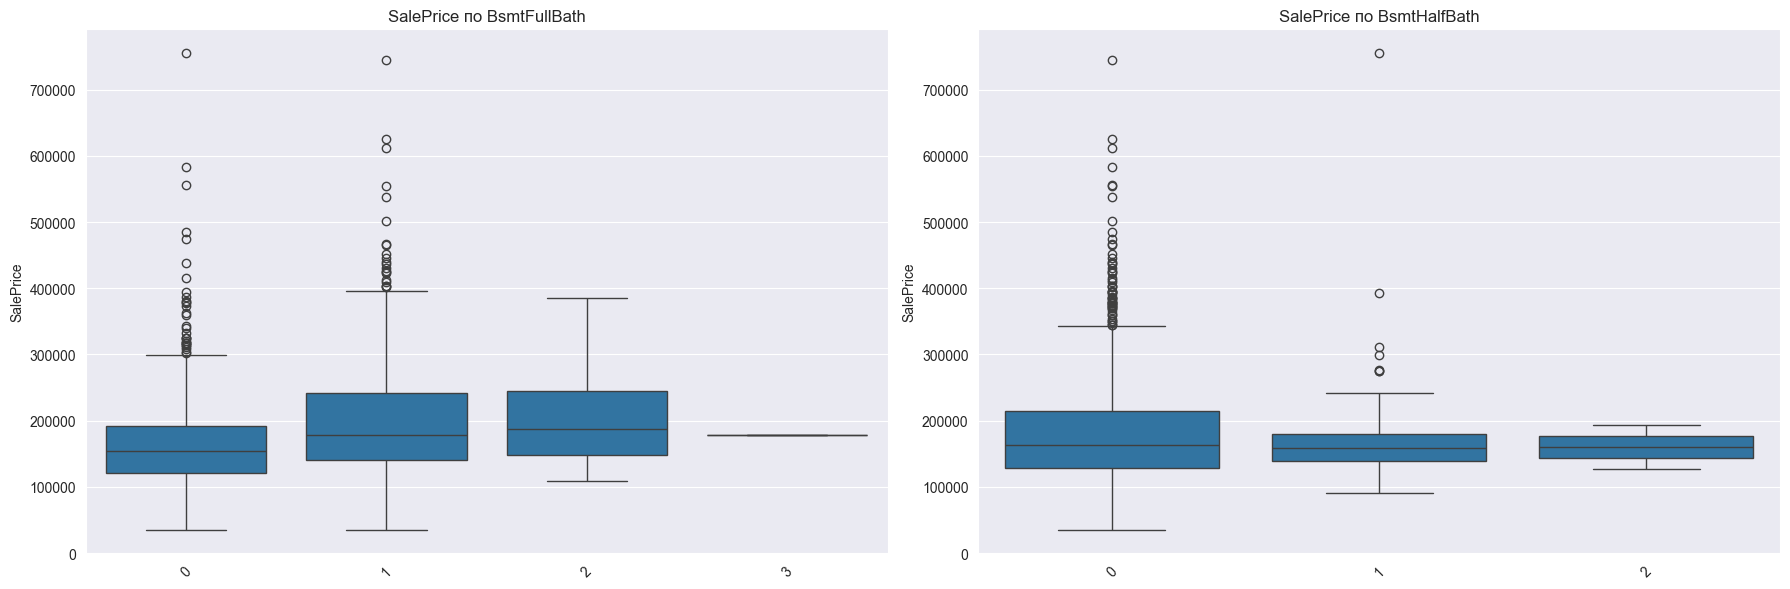

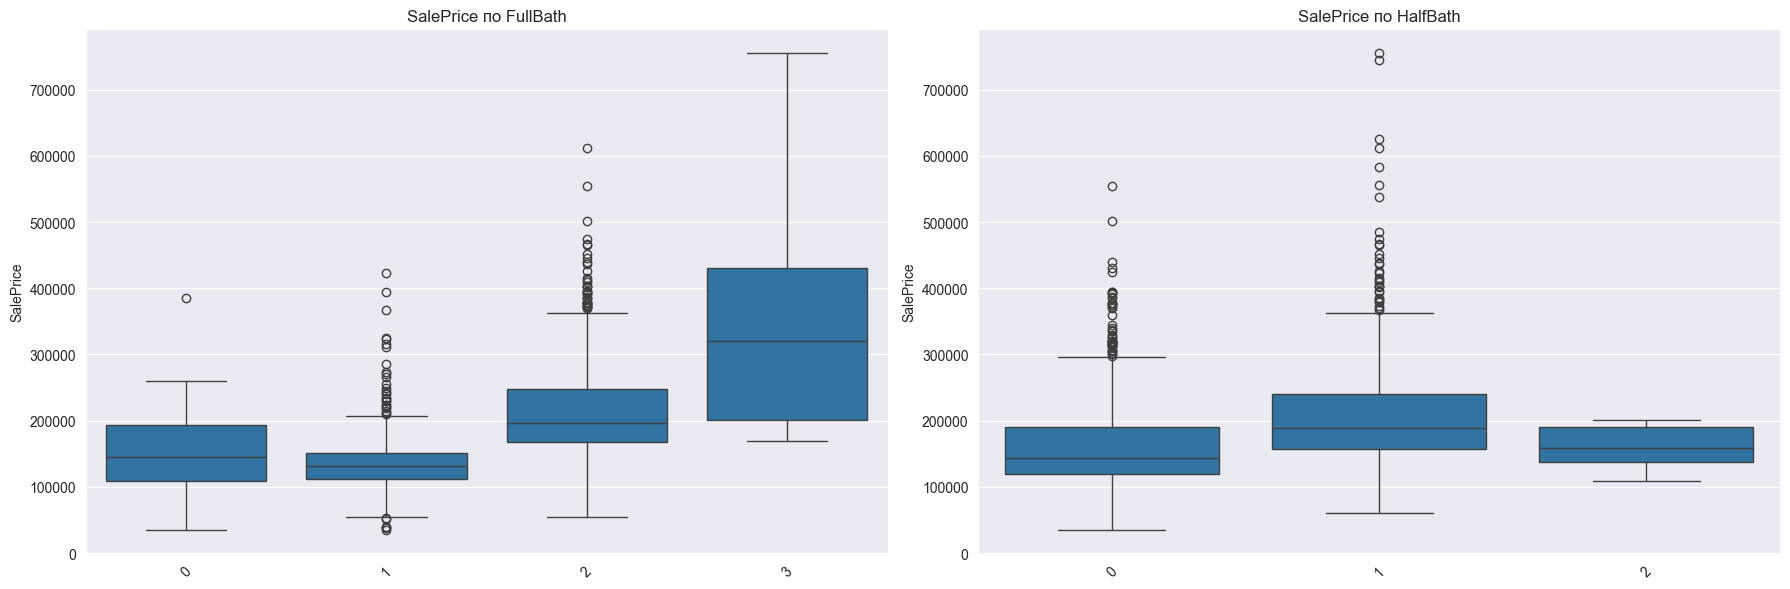

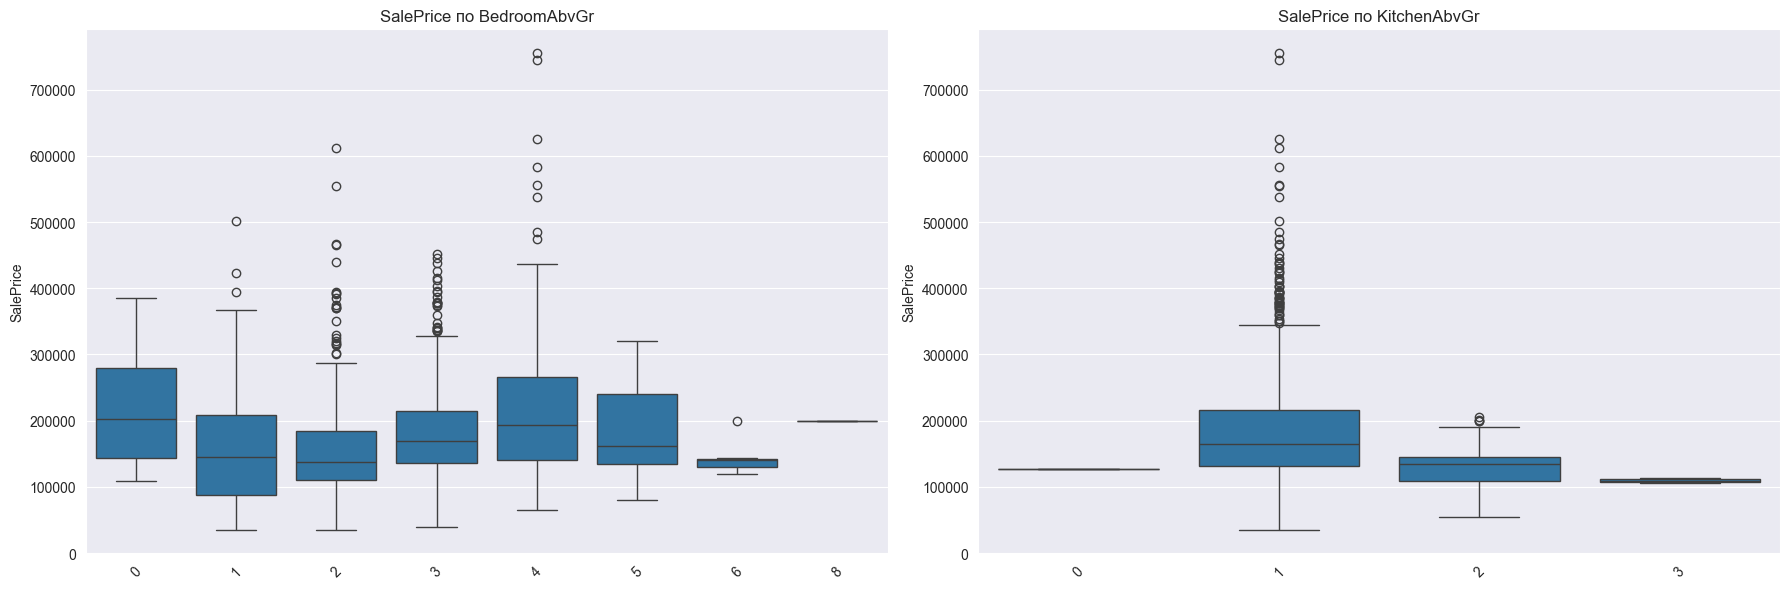

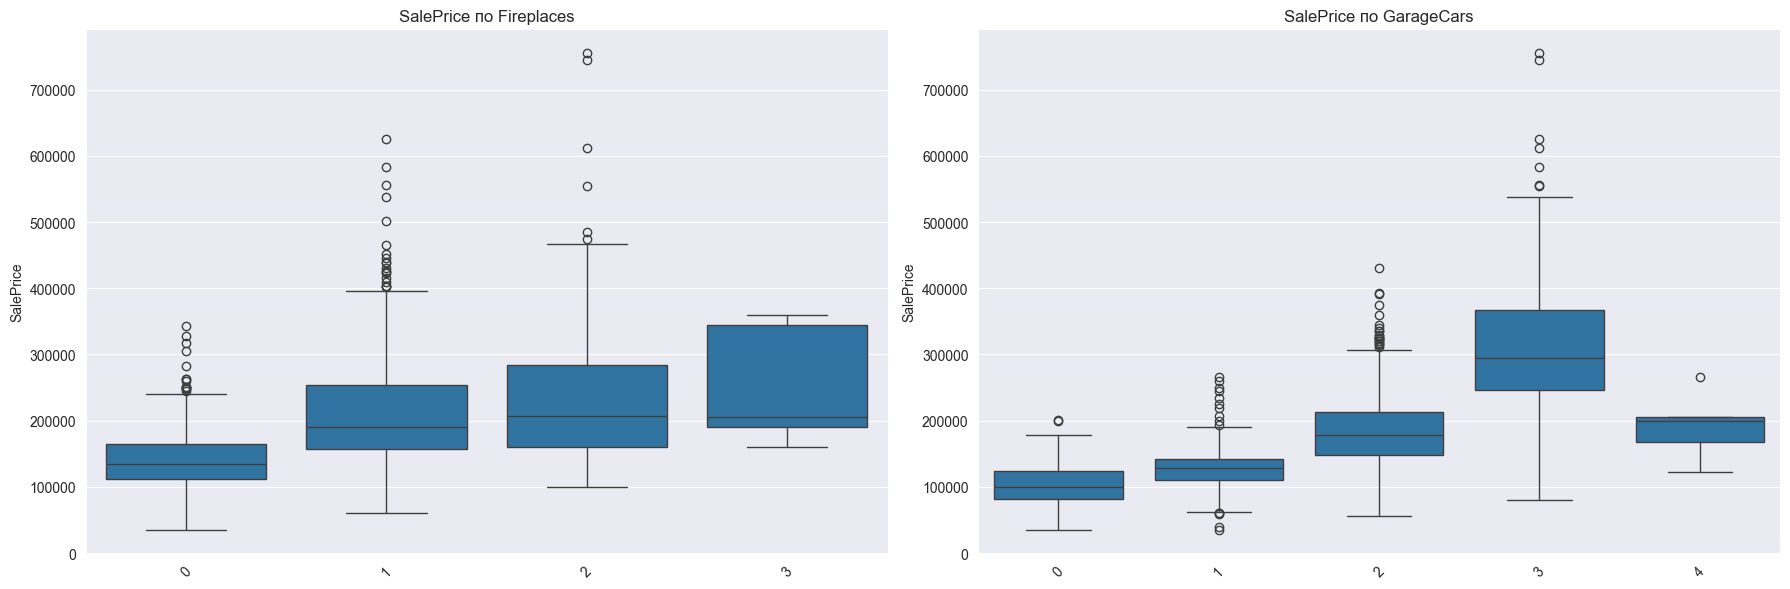

In [89]:
for i in range(0, len(cat_columns), 2):
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 2, 1)
    cat1 = cat_columns[i]

    grouped_stats1 = df.groupby(cat1)[target_column].agg([
        ('count', 'count'), ('mean', 'mean'), ('std', 'std'),
        ('min', 'min'), ('max', 'max'), ('median', 'median')
    ]).round(3)
    grouped_stats1 = grouped_stats1.sort_values('mean', ascending=False)

    top_categories1 = grouped_stats1.index
    top_data1 = df[df[cat1].isin(top_categories1)]

    sns.boxplot(data=top_data1, x=cat1, y=target_column)
    plt.xticks(rotation=45)
    plt.title(f'{target_column} по {cat1}')
    plt.xlabel('')

    if i + 1 < len(cat_columns):
        plt.subplot(1, 2, 2)
        cat2 = cat_columns[i + 1]

        grouped_stats2 = df.groupby(cat2)[target_column].agg([
            ('count', 'count'), ('mean', 'mean'), ('std', 'std'),
            ('min', 'min'), ('max', 'max'), ('median', 'median')
        ]).round(3)
        grouped_stats2 = grouped_stats2.sort_values('mean', ascending=False)

        top_categories2 = grouped_stats2.index
        top_data2 = df[df[cat2].isin(top_categories2)]

        sns.boxplot(data=top_data2, x=cat2, y=target_column)
        plt.xticks(rotation=45)
        plt.title(f'{target_column} по {cat2}')
        plt.xlabel('')

    plt.tight_layout()
    plt.show()

На большинстве признаков замечено большое кол-во выбросов, которое следует бы обрезать (в идеале). Так же мы видим как от конкретного значения признака зависит наша целевая переменная

## Выполним обработку данных и попытаемся создать что-то похожее на правду и Pipeline

### Обработаем числовые данные

Изменим числовые данные смотря на их распределение (Гистограмма количества всех числовых признаков)

In [93]:
num_pipe_LotFrontage = Pipeline([
    ('scaler', StandardScaler()),
])
num_LotFrontage = ['LotFrontage']

num_pipe_LotArea = Pipeline([
    ('power', PowerTransformer()),
])
num_LotArea = ['LotArea']

num_pipe_YearBuilt = Pipeline([
    ('power', PowerTransformer()),
])
num_YearBuilt = ['YearBuilt']

num_pipe_YearRemodAdd = Pipeline([
    ('power', PowerTransformer()),
])
num_YearRemodAdd = ['YearRemodAdd']

num_pipe_MasVnrArea = Pipeline([
    ('power', PowerTransformer()),
])
num_MasVnrArea = ['MasVnrArea']

num_pipe_BsmtFinSF1 = Pipeline([
    ('power', PowerTransformer()),
])
num_BsmtFinSF1 = ['BsmtFinSF1']

num_pipe_BsmtFinSF2 = Pipeline([
    ('power', PowerTransformer()),
])
num_BsmtFinSF2 = ['BsmtFinSF2']

num_pipe_BsmtUnfSF = Pipeline([
    ('power', PowerTransformer()),
])
num_BsmtUnfSF = ['BsmtUnfSF']

num_pipe_TotalBsmtSF = Pipeline([
    ('scaler', StandardScaler()),
])
num_TotalBsmtSF = ['TotalBsmtSF']

num_pipe_1stFlrSF = Pipeline([
    ('scaler', StandardScaler()),
])
num_1stFlrSF = ['1stFlrSF']

num_pipe_2ndFlrSF = Pipeline([
    ('scaler', StandardScaler()),
])
num_2ndFlrSF = ['2ndFlrSF']

num_pipe_LowQualFinSF = Pipeline([
    ('scaler', StandardScaler()),
])
num_LowQualFinSF = ['LowQualFinSF']

num_pipe_GrLivArea = Pipeline([
    ('scaler', StandardScaler()),
])
num_GrLivArea = ['GrLivArea']

num_pipe_GarageYrBlt = Pipeline([
    ('power', PowerTransformer()),
])
num_GarageYrBlt = ['GarageYrBlt']

num_pipe_GarageArea = Pipeline([
    ('scaler', StandardScaler()),
])
num_GarageArea = ['GarageArea']

num_pipe_WoodDeckSF = Pipeline([
    ('scaler', StandardScaler()),
])
num_WoodDeckSF = ['WoodDeckSF']

num_pipe_OpenPorchSF = Pipeline([
    ('power', PowerTransformer()),
])
num_OpenPorchSF = ['OpenPorchSF']

num_pipe_EnclosedPorch = Pipeline([
    ('scaler', StandardScaler()),
])
num_EnclosedPorch = ['EnclosedPorch']

num_pipe_3SsnPorch = Pipeline([
    ('scaler', StandardScaler()),
])
num_3SsnPorch = ['3SsnPorch']

num_pipe_ScreenPorch = Pipeline([
    ('scaler', StandardScaler()),
])
num_ScreenPorch = ['ScreenPorch']

num_pipe_PoolArea = Pipeline([
    ('scaler', StandardScaler()),
])
num_PoolArea = ['PoolArea']

num_pipe_MiscVal = Pipeline([
    ('power', PowerTransformer()),
])
num_MiscVal = ['MiscVal']

num_pipe_YrSold = Pipeline([
    ('power', PowerTransformer()),
])
num_YrSold = ['YrSold']

num_pipe_SalePrice = Pipeline([
    ('scaler', StandardScaler()),
])
num_SalePrice = ['SalePrice']

### Обработаем категориальные данные

Изменим данные с помощью one-hot тк уникальных значений в признаках не много

In [97]:
cat_pipe_MSZoning = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_MSZoning = ['MSZoning']

cat_pipe_Street = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_Street = ['Street']

cat_pipe_LotShape = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_LotShape = ['LotShape']

cat_pipe_LandContour = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_LandContour = ['LandContour']

cat_pipe_Utilities = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_Utilities = ['Utilities']

cat_pipe_LotConfig = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_LotConfig = ['LotConfig']

cat_pipe_LandSlope = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_LandSlope = ['LandSlope']

cat_pipe_Neighborhood = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_Neighborhood = ['Neighborhood']

cat_pipe_Condition1 = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_Condition1 = ['Condition1']

cat_pipe_Condition2 = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_Condition2 = ['Condition2']

cat_pipe_BldgType = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_BldgType = ['BldgType']

cat_pipe_HouseStyle = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_HouseStyle = ['HouseStyle']

cat_pipe_RoofStyle = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_RoofStyle = ['RoofStyle']

cat_pipe_RoofMatl = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_RoofMatl = ['RoofMatl']

cat_pipe_Exterior1st = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_Exterior1st = ['Exterior1st']

cat_pipe_Exterior2nd = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_Exterior2nd = ['Exterior2nd']

cat_pipe_MasVnrType = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_MasVnrType = ['MasVnrType']

cat_pipe_ExterQual = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_ExterQual = ['ExterQual']

cat_pipe_ExterCond = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_ExterCond = ['ExterCond']

cat_pipe_Foundation = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_Foundation = ['Foundation']

cat_pipe_BsmtQual = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_BsmtQual = ['BsmtQual']

cat_pipe_BsmtCond = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_BsmtCond = ['BsmtCond']

cat_pipe_BsmtExposure = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_BsmtExposure = ['BsmtExposure']

cat_pipe_BsmtFinType1 = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_BsmtFinType1 = ['BsmtFinType1']

cat_pipe_BsmtFinType2 = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_BsmtFinType2 = ['BsmtFinType2']

cat_pipe_Heating = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_Heating = ['Heating']

cat_pipe_HeatingQC = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_HeatingQC = ['HeatingQC']

cat_pipe_CentralAir = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_CentralAir = ['CentralAir']

cat_pipe_Electrical = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_Electrical = ['Electrical']

cat_pipe_KitchenQual = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_KitchenQual = ['KitchenQual']

cat_pipe_Functional = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_Functional = ['Functional']

cat_pipe_FireplaceQu = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_FireplaceQu = ['FireplaceQu']

cat_pipe_GarageType = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_GarageType = ['GarageType']

cat_pipe_GarageFinish = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_GarageFinish = ['GarageFinish']

cat_pipe_GarageQual = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_GarageQual = ['GarageQual']

cat_pipe_GarageCond = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_GarageCond = ['GarageCond']

cat_pipe_PavedDrive = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_PavedDrive = ['PavedDrive']

cat_pipe_SaleType = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_SaleType = ['SaleType']

cat_pipe_SaleCondition = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_SaleCondition = ['SaleCondition']

cat_pipe_MSSubClass = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_MSSubClass = ['MSSubClass']

cat_pipe_OverallQual = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_OverallQual = ['OverallQual']

cat_pipe_OverallCond = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_OverallCond = ['OverallCond']

cat_pipe_TotRmsAbvGrd = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_TotRmsAbvGrd = ['TotRmsAbvGrd']

cat_pipe_MoSold = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_MoSold = ['MoSold']

cat_pipe_BsmtFullBath = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_BsmtFullBath = ['BsmtFullBath']

cat_pipe_BsmtHalfBath = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_BsmtHalfBath = ['BsmtHalfBath']

cat_pipe_FullBath = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_FullBath = ['FullBath']

cat_pipe_HalfBath = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_HalfBath = ['HalfBath']

cat_pipe_BedroomAbvGr = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_BedroomAbvGr = ['BedroomAbvGr']

cat_pipe_KitchenAbvGr = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_KitchenAbvGr = ['KitchenAbvGr']

cat_pipe_Fireplaces = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_Fireplaces = ['Fireplaces']

cat_pipe_GarageCars = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_GarageCars = ['GarageCars']

### Объединим в единый Трансформер Колонок Данных

In [98]:
preprocessors = ColumnTransformer(transformers=[
    # Числовые признаки
    ('LotFrontage', num_pipe_LotFrontage, num_LotFrontage),
    ('LotArea', num_pipe_LotArea, num_LotArea),
    ('YearBuilt', num_pipe_YearBuilt, num_YearBuilt),
    ('YearRemodAdd', num_pipe_YearRemodAdd, num_YearRemodAdd),
    ('MasVnrArea', num_pipe_MasVnrArea, num_MasVnrArea),
    ('BsmtFinSF1', num_pipe_BsmtFinSF1, num_BsmtFinSF1),
    ('BsmtFinSF2', num_pipe_BsmtFinSF2, num_BsmtFinSF2),
    ('BsmtUnfSF', num_pipe_BsmtUnfSF, num_BsmtUnfSF),
    ('TotalBsmtSF', num_pipe_TotalBsmtSF, num_TotalBsmtSF),
    ('1stFlrSF', num_pipe_1stFlrSF, num_1stFlrSF),
    ('2ndFlrSF', num_pipe_2ndFlrSF, num_2ndFlrSF),
    ('LowQualFinSF', num_pipe_LowQualFinSF, num_LowQualFinSF),
    ('GrLivArea', num_pipe_GrLivArea, num_GrLivArea),
    ('GarageYrBlt', num_pipe_GarageYrBlt, num_GarageYrBlt),
    ('GarageArea', num_pipe_GarageArea, num_GarageArea),
    ('WoodDeckSF', num_pipe_WoodDeckSF, num_WoodDeckSF),
    ('OpenPorchSF', num_pipe_OpenPorchSF, num_OpenPorchSF),
    ('EnclosedPorch', num_pipe_EnclosedPorch, num_EnclosedPorch),
    ('3SsnPorch', num_pipe_3SsnPorch, num_3SsnPorch),
    ('ScreenPorch', num_pipe_ScreenPorch, num_ScreenPorch),
    ('PoolArea', num_pipe_PoolArea, num_PoolArea),
    ('MiscVal', num_pipe_MiscVal, num_MiscVal),
    ('YrSold', num_pipe_YrSold, num_YrSold),
    ('SalePrice', num_pipe_SalePrice, num_SalePrice),
    # Категориальные признаки
    ('MSZoning', cat_pipe_MSZoning, cat_MSZoning),
    ('Street', cat_pipe_Street, cat_Street),
    ('LotShape', cat_pipe_LotShape, cat_LotShape),
    ('LandContour', cat_pipe_LandContour, cat_LandContour),
    ('Utilities', cat_pipe_Utilities, cat_Utilities),
    ('LotConfig', cat_pipe_LotConfig, cat_LotConfig),
    ('LandSlope', cat_pipe_LandSlope, cat_LandSlope),
    ('Neighborhood', cat_pipe_Neighborhood, cat_Neighborhood),
    ('Condition1', cat_pipe_Condition1, cat_Condition1),
    ('Condition2', cat_pipe_Condition2, cat_Condition2),
    ('BldgType', cat_pipe_BldgType, cat_BldgType),
    ('HouseStyle', cat_pipe_HouseStyle, cat_HouseStyle),
    ('RoofStyle', cat_pipe_RoofStyle, cat_RoofStyle),
    ('RoofMatl', cat_pipe_RoofMatl, cat_RoofMatl),
    ('Exterior1st', cat_pipe_Exterior1st, cat_Exterior1st),
    ('Exterior2nd', cat_pipe_Exterior2nd, cat_Exterior2nd),
    ('MasVnrType', cat_pipe_MasVnrType, cat_MasVnrType),
    ('ExterQual', cat_pipe_ExterQual, cat_ExterQual),
    ('ExterCond', cat_pipe_ExterCond, cat_ExterCond),
    ('Foundation', cat_pipe_Foundation, cat_Foundation),
    ('BsmtQual', cat_pipe_BsmtQual, cat_BsmtQual),
    ('BsmtCond', cat_pipe_BsmtCond, cat_BsmtCond),
    ('BsmtExposure', cat_pipe_BsmtExposure, cat_BsmtExposure),
    ('BsmtFinType1', cat_pipe_BsmtFinType1, cat_BsmtFinType1),
    ('BsmtFinType2', cat_pipe_BsmtFinType2, cat_BsmtFinType2),
    ('Heating', cat_pipe_Heating, cat_Heating),
    ('HeatingQC', cat_pipe_HeatingQC, cat_HeatingQC),
    ('CentralAir', cat_pipe_CentralAir, cat_CentralAir),
    ('Electrical', cat_pipe_Electrical, cat_Electrical),
    ('KitchenQual', cat_pipe_KitchenQual, cat_KitchenQual),
    ('Functional', cat_pipe_Functional, cat_Functional),
    ('FireplaceQu', cat_pipe_FireplaceQu, cat_FireplaceQu),
    ('GarageType', cat_pipe_GarageType, cat_GarageType),
    ('GarageFinish', cat_pipe_GarageFinish, cat_GarageFinish),
    ('GarageQual', cat_pipe_GarageQual, cat_GarageQual),
    ('GarageCond', cat_pipe_GarageCond, cat_GarageCond),
    ('PavedDrive', cat_pipe_PavedDrive, cat_PavedDrive),
    ('SaleType', cat_pipe_SaleType, cat_SaleType),
    ('SaleCondition', cat_pipe_SaleCondition, cat_SaleCondition),
    ('MSSubClass', cat_pipe_MSSubClass, cat_MSSubClass),
    ('OverallQual', cat_pipe_OverallQual, cat_OverallQual),
    ('OverallCond', cat_pipe_OverallCond, cat_OverallCond),
    ('TotRmsAbvGrd', cat_pipe_TotRmsAbvGrd, cat_TotRmsAbvGrd),
    ('MoSold', cat_pipe_MoSold, cat_MoSold),
    ('BsmtFullBath', cat_pipe_BsmtFullBath, cat_BsmtFullBath),
    ('BsmtHalfBath', cat_pipe_BsmtHalfBath, cat_BsmtHalfBath),
    ('FullBath', cat_pipe_FullBath, cat_FullBath),
    ('HalfBath', cat_pipe_HalfBath, cat_HalfBath),
    ('BedroomAbvGr', cat_pipe_BedroomAbvGr, cat_BedroomAbvGr),
    ('KitchenAbvGr', cat_pipe_KitchenAbvGr, cat_KitchenAbvGr),
    ('Fireplaces', cat_pipe_Fireplaces, cat_Fireplaces),
    ('GarageCars', cat_pipe_GarageCars, cat_GarageCars),
])

Проверяем, что все создалось

In [116]:
preprocessors.fit(df)

preprocessors.transformers_

[('LotFrontage',
  Pipeline(steps=[('scaler', StandardScaler())]),
  ['LotFrontage']),
 ('LotArea', Pipeline(steps=[('power', PowerTransformer())]), ['LotArea']),
 ('YearBuilt', Pipeline(steps=[('power', PowerTransformer())]), ['YearBuilt']),
 ('YearRemodAdd',
  Pipeline(steps=[('power', PowerTransformer())]),
  ['YearRemodAdd']),
 ('MasVnrArea',
  Pipeline(steps=[('power', PowerTransformer())]),
  ['MasVnrArea']),
 ('BsmtFinSF1',
  Pipeline(steps=[('power', PowerTransformer())]),
  ['BsmtFinSF1']),
 ('BsmtFinSF2',
  Pipeline(steps=[('power', PowerTransformer())]),
  ['BsmtFinSF2']),
 ('BsmtUnfSF', Pipeline(steps=[('power', PowerTransformer())]), ['BsmtUnfSF']),
 ('TotalBsmtSF',
  Pipeline(steps=[('scaler', StandardScaler())]),
  ['TotalBsmtSF']),
 ('1stFlrSF', Pipeline(steps=[('scaler', StandardScaler())]), ['1stFlrSF']),
 ('2ndFlrSF', Pipeline(steps=[('scaler', StandardScaler())]), ['2ndFlrSF']),
 ('LowQualFinSF',
  Pipeline(steps=[('scaler', StandardScaler())]),
  ['LowQualFinSF']),